# <p align="center">Siemens Sales Forecast</p>

---

## <p align="center">*2 - Feature Selection & Modeling*</p>

---

### 👥 **Team Members**
- **Ana Farinha** *(Student Number: 20211514)*  
- **António Oliveira** *(Student Number: 20211595)*  
- **Mariana Neto** *(Student Number: 20211527)*  
- **Salvador Domingues** *(Student Number: 20240597)*  

📅 **Date:** *April 1, 2025*  
📍 **Prepared for:** *Siemens*  

**GitHub Repo:** https://github.com/MGN19/Siemens-forecast

---

# ToC

<a class="anchor" id="top"></a>


1. [Import Libraries & Data](#1.-Import-Libraries-&-Data) <br>

2. [Feature Selection](#2.-Feature-Selection) <br>

3. [Model Training](#3.-Model-Training) <br>

4. [Results Comparison](#4.-Results-Comparison) <br>

# 1. Import Libraries & Data

In [2]:
import os
import pandas as pd
import json
import re

# Models
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import HistGradientBoostingRegressor

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")


# External Files
import fs_modelling as fs
import utils as u

**Data**

In [3]:
X_train = pd.read_csv('./data/X_train_data/X_train.csv', index_col = 'Unnamed: 0')
X_val = pd.read_csv('./data/X_val_data/X_val.csv', index_col = 'Unnamed: 0')
X_test = pd.read_csv('./data/X_test_data/X_test.csv', index_col = 'Unnamed: 0')

def import_all_csvs(folder):
    """Imports all CSV files from a given folder and tracks variable names."""
    var_list = []

    for file in os.listdir(folder):
        if file.endswith('.csv'):
            df_name = file.replace('.csv', '')
            df = pd.read_csv(os.path.join(folder, file), index_col='Unnamed: 0')
            globals()[df_name] = df  # Save as a global variable
            var_list.append(df_name)  # Track variable name
    
    return var_list

# Import each CSV file as individual DataFrames
y_train_list = import_all_csvs('data/y_train_data')
y_val_list = import_all_csvs('data/y_val_data')

**Scaling**

In [4]:
X_train_scaled, X_val_scaled, X_test_scaled = fs.scale_data(X_train, 
                                          X_val, X_test,
                                          scaler_type='minmax')

# 2. Feature Selection

In [4]:
selected_features = {}

for y_train_name in y_train_list:
    y_train = globals()[y_train_name]

    print(f'\n Next Feature {y_train_name}... \n')

    selected_features[y_train_name] = fs.feature_selection(
        X_train_scaled, 
        y_train, 
        method='all', # all but LASSO because it was mostly selecting 0 features
        rfe_model=XGBRegressor(), # use fo lgbm verbose = -1
        mi_threshold = 0.05,
        plot=False
    )
    


# Save
with open("utils.py", "a") as f:
    f.write(f"\n\n\nfs_mm_xgb4 = {repr(selected_features)}")



 Next Feature y_train_36... 

Selected 143 features by correlation
Selected 1 features by RFECV
Selected 79 features by importance with threshold 0.0021551724137931034
Selected 128 features by Mutual Information
Selected 0 features that intersect across all methods

 Next Feature y_train_8... 

Selected 143 features by correlation


KeyboardInterrupt: 

**Final Features**

In [5]:
features = u.fs_mm_xgb2

# 3. Model Training

### ARIMA


 Training model for Product Category 36


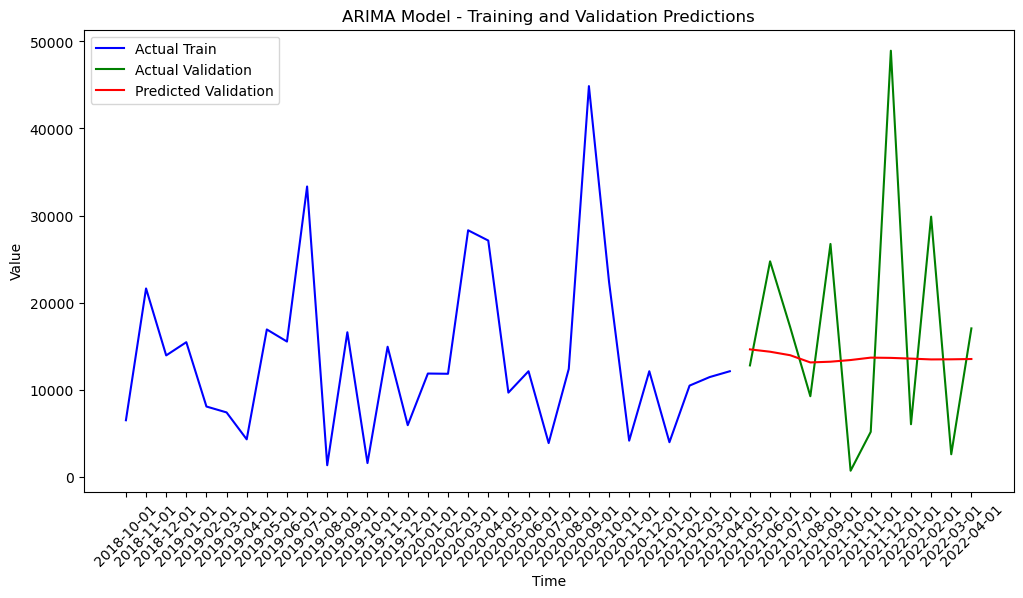

Results appended to ./results/36_results.csv

 Training model for Product Category 8


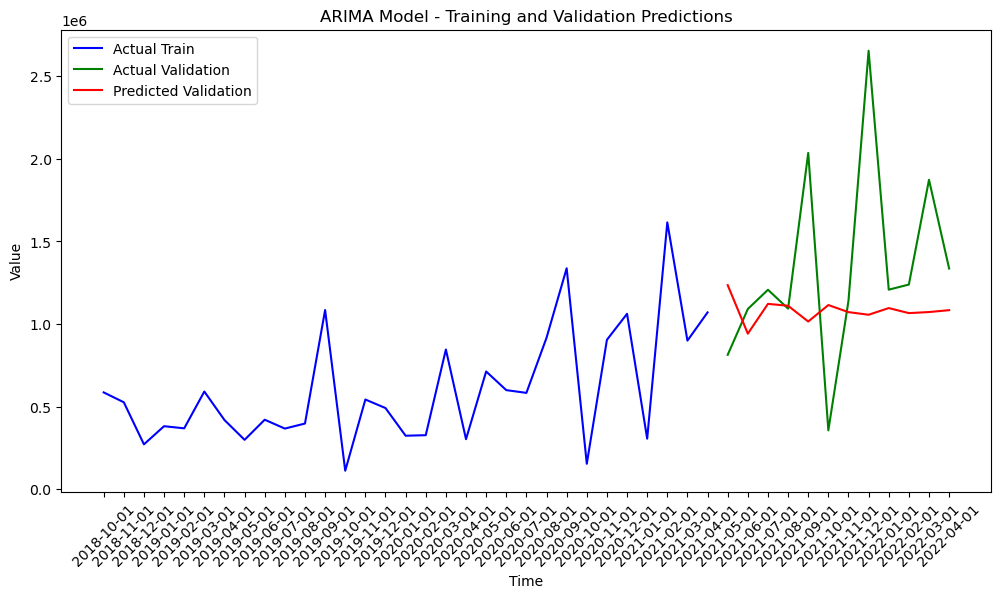

Results appended to ./results/8_results.csv

 Training model for Product Category 20


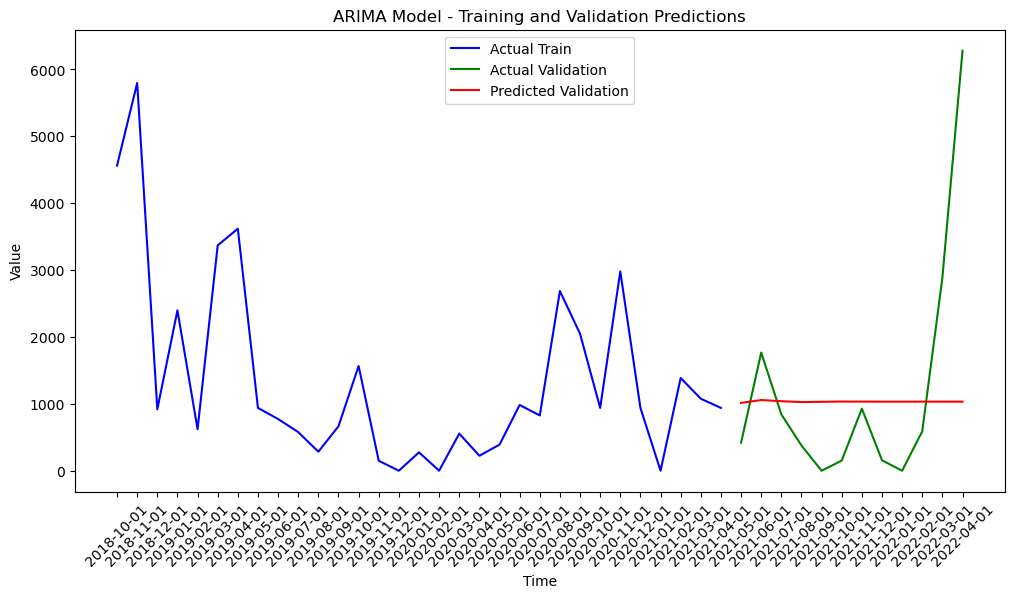

Results appended to ./results/20_results.csv

 Training model for Product Category 9


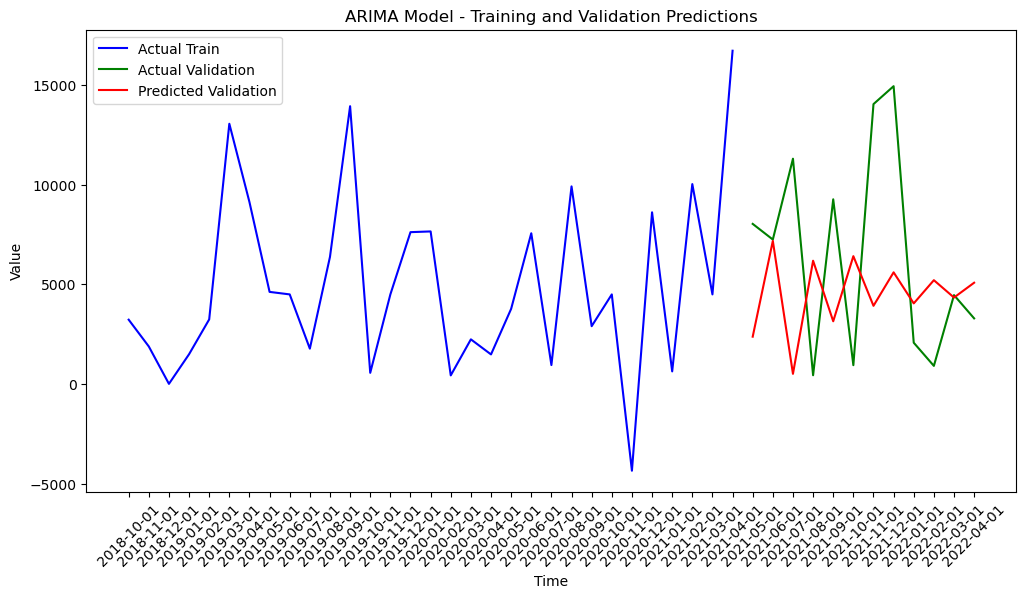

Results appended to ./results/9_results.csv

 Training model for Product Category 4


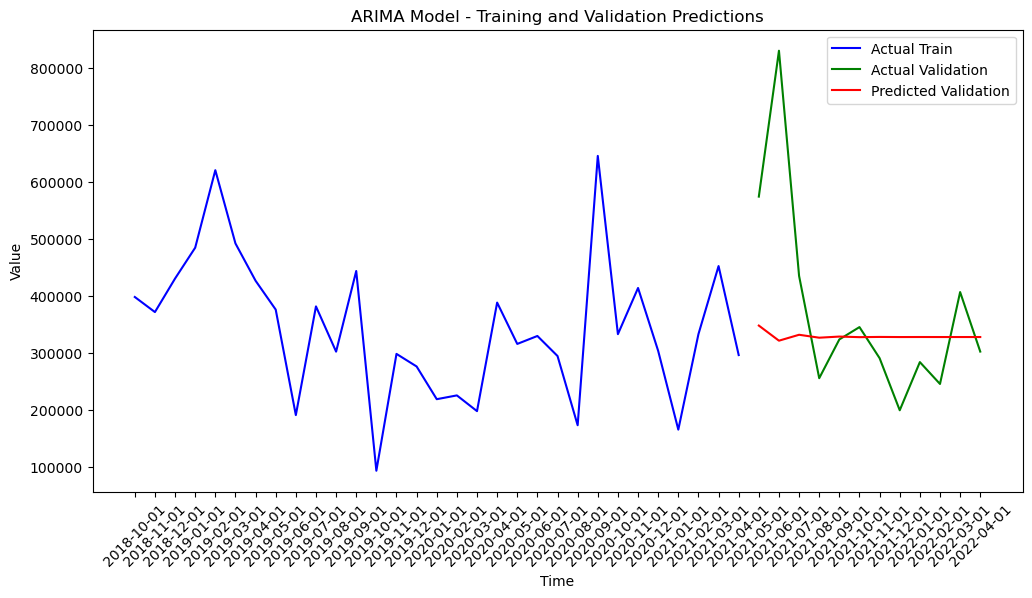

Results appended to ./results/4_results.csv

 Training model for Product Category 11


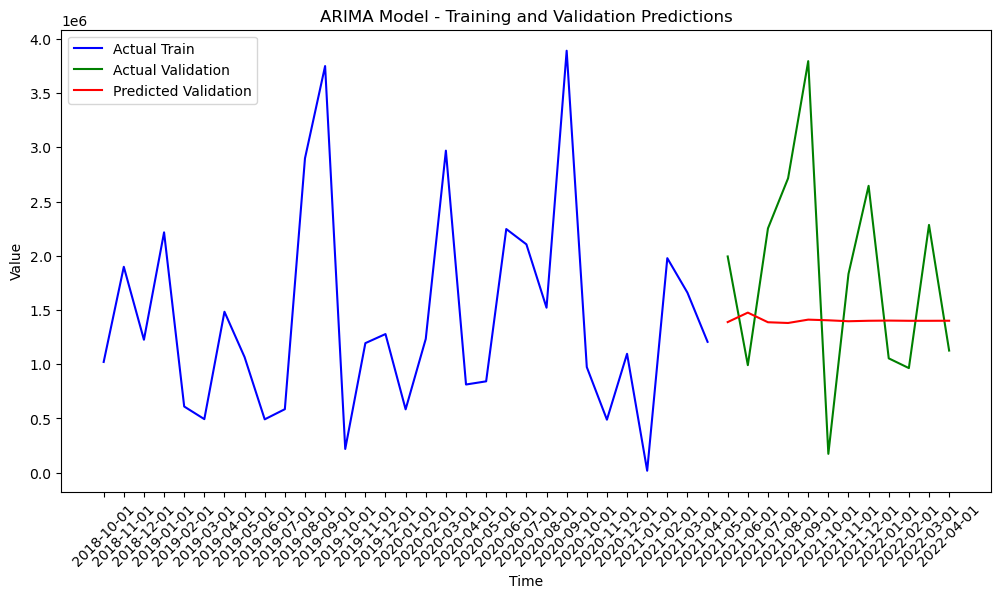

Results appended to ./results/11_results.csv

 Training model for Product Category 5


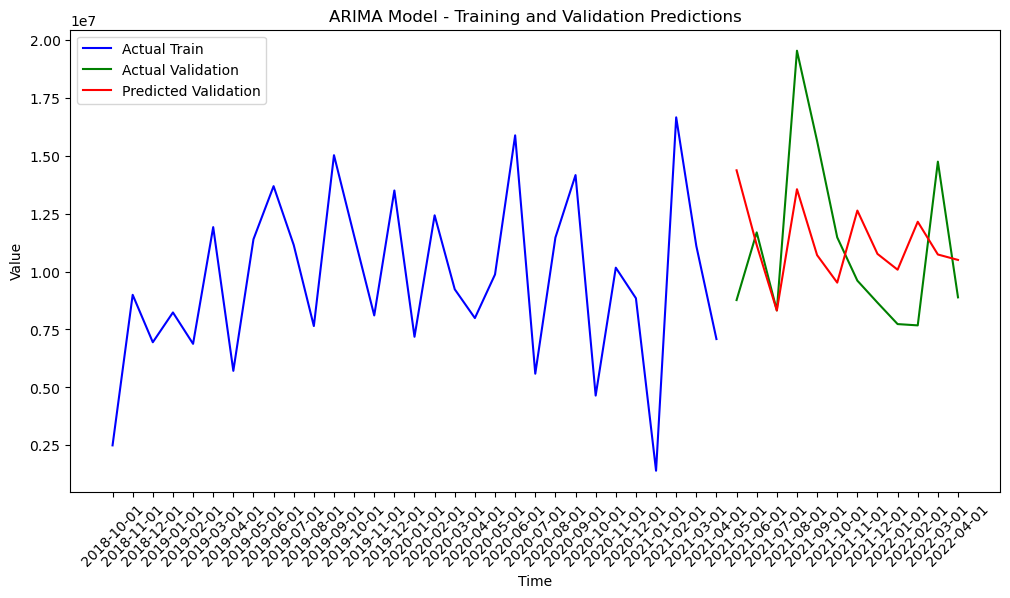

Results appended to ./results/5_results.csv

 Training model for Product Category 12


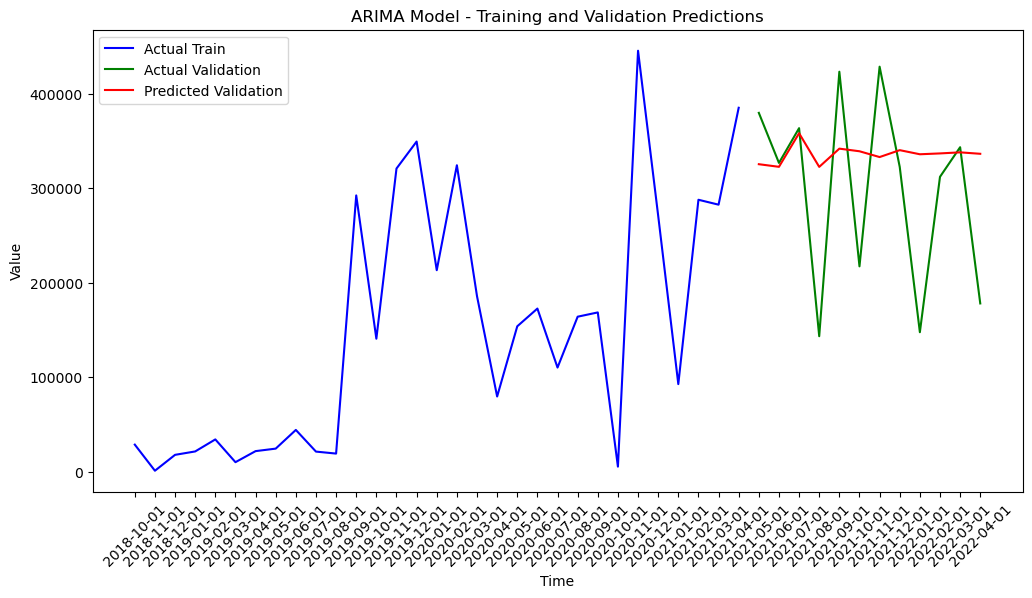

Results appended to ./results/12_results.csv

 Training model for Product Category 13


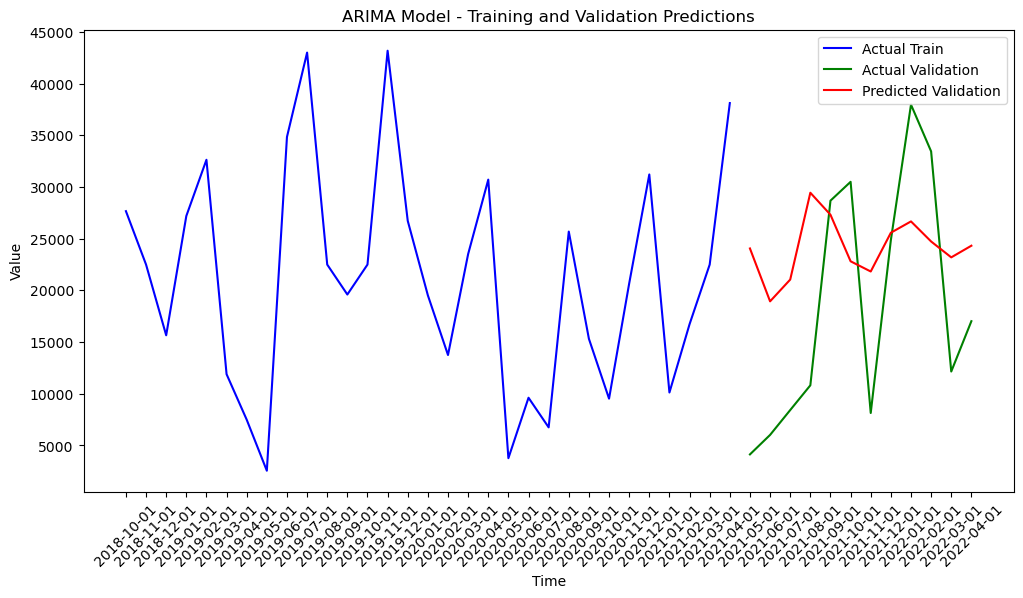

Results appended to ./results/13_results.csv

 Training model for Product Category 6


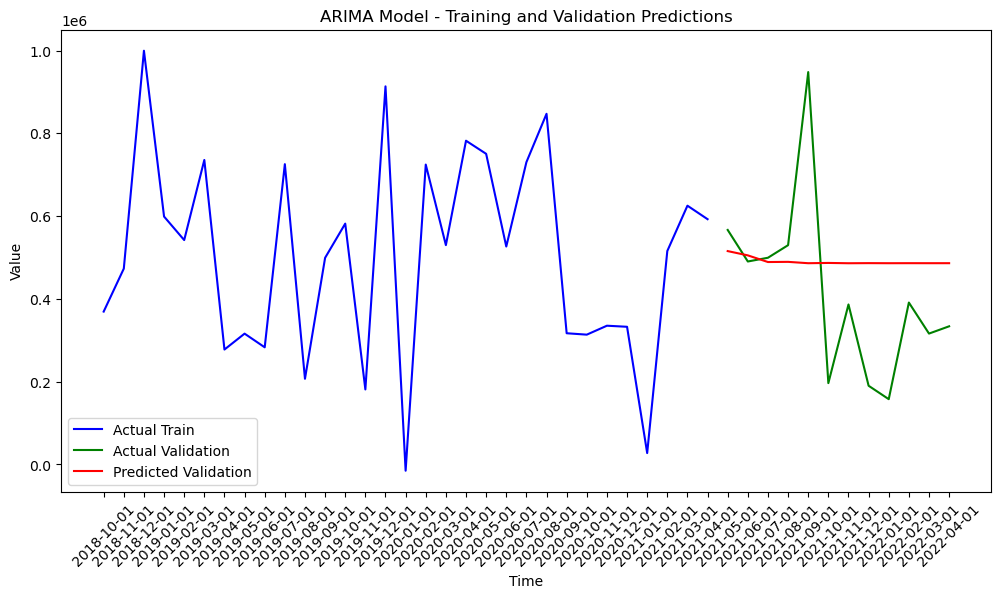

Results appended to ./results/6_results.csv

 Training model for Product Category 16


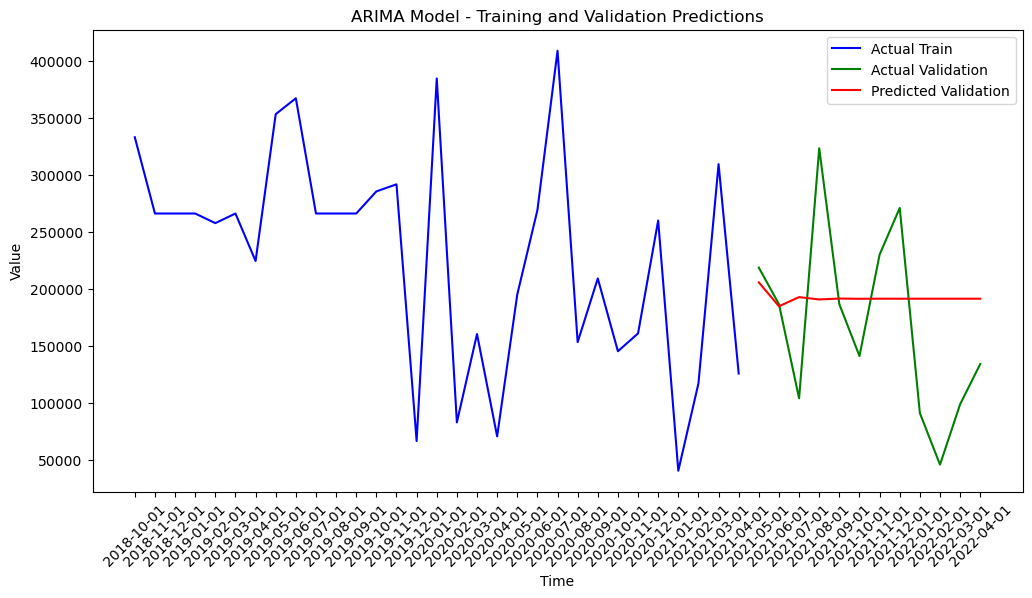

Results appended to ./results/16_results.csv

 Training model for Product Category 3


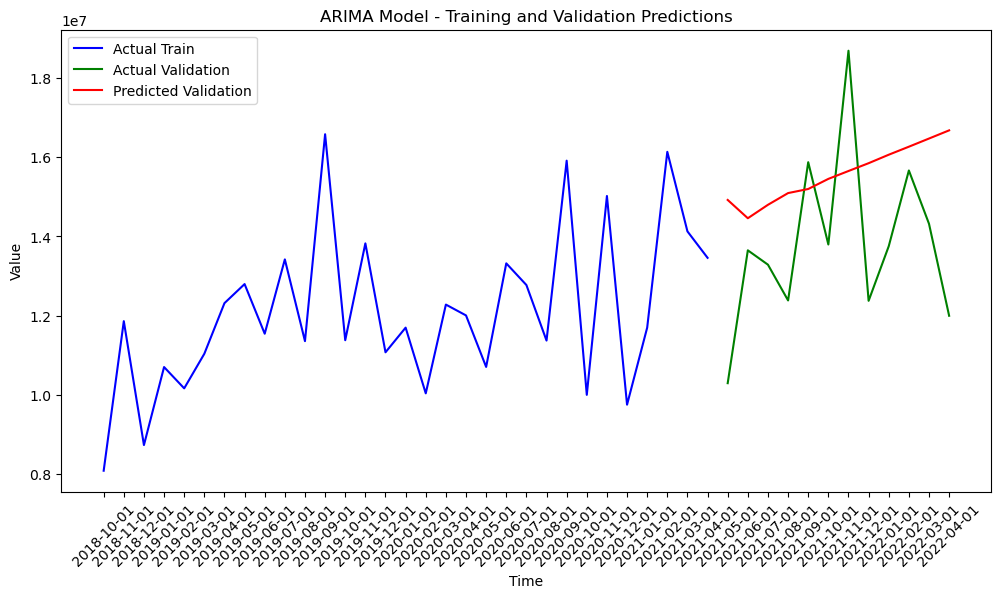

Results appended to ./results/3_results.csv

 Training model for Product Category 1


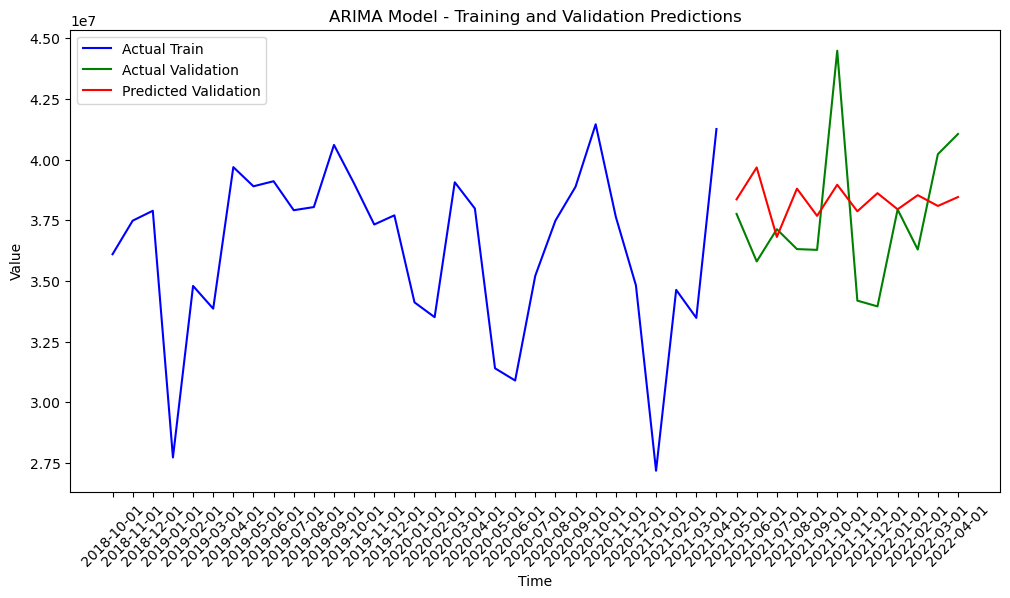

Results appended to ./results/1_results.csv

 Training model for Product Category 14


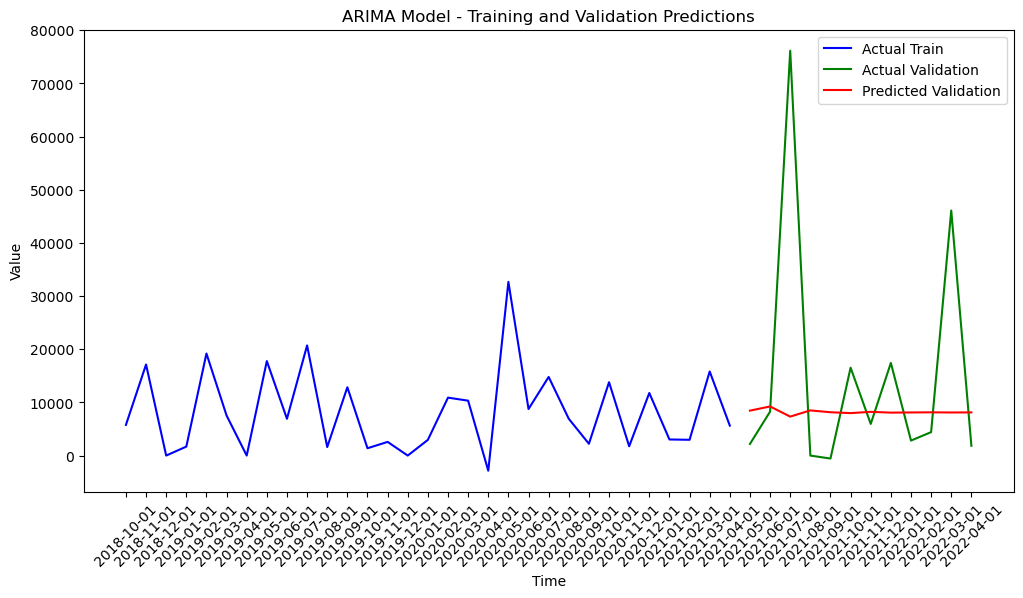

Results appended to ./results/14_results.csv


In [137]:
# Empty dicts
model_fits = {}
val_preds = {}
model_summaries = {}

# ARIMA for all Product Categ
for target_name, selected_features in features.items():
    target_train = globals().get(f'y_train_{target_name.split("_")[-1]}')
    target_val = globals().get(f'y_val_{target_name.split("_")[-1]}')

    target_number = target_name.split('_')[-1]

    print(f'\n Training model for Product Category {target_number}')

    # Fit the ARIMA model using fs.stats_models method
    model_fits[target_number], val_preds[target_number], model_summaries[target_number] = fs.stats_models(
        'arima', X_train_scaled, X_val_scaled, 
        target_train, target_val, order=(3, 1, 1),
        plot=True,
        csv_path=f'./results/{target_number}_results.csv'
    )

In [22]:
#model_fit_ar, val_preds_ar, model_summary_ar = fs.stats_models('arima', X_train_scaled, X_val_scaled, 
#                                     y_train_1, y_val_1, order=(1,1,3),
#                                     plot = False, 
#                                     csv_path = './modelling_csvs/test3.csv')

**Example for prediction on test data**

In [16]:
steps_ahead = 30  # Number of future steps you want to predict
future_preds = model_fits['36'].forecast(steps=steps_ahead)
print(future_preds)


2021-05-01     1923.405189
2021-06-01    54188.938431
2021-07-01    43331.492644
2021-08-01    45586.977697
2021-09-01    45118.431694
2021-10-01    45215.765683
2021-11-01    45195.545885
2021-12-01    45199.746270
2022-01-01    45198.873698
2022-02-01    45199.054963
2022-03-01    45199.017308
2022-04-01    45199.025130
2022-05-01    45199.023505
2022-06-01    45199.023843
2022-07-01    45199.023772
2022-08-01    45199.023787
2022-09-01    45199.023784
2022-10-01    45199.023785
2022-11-01    45199.023785
2022-12-01    45199.023785
2023-01-01    45199.023785
2023-02-01    45199.023785
2023-03-01    45199.023785
2023-04-01    45199.023785
2023-05-01    45199.023785
2023-06-01    45199.023785
2023-07-01    45199.023785
2023-08-01    45199.023785
2023-09-01    45199.023785
2023-10-01    45199.023785
Freq: MS, Name: predicted_mean, dtype: float64


### SARIMAX


 Training model for Product Category 36


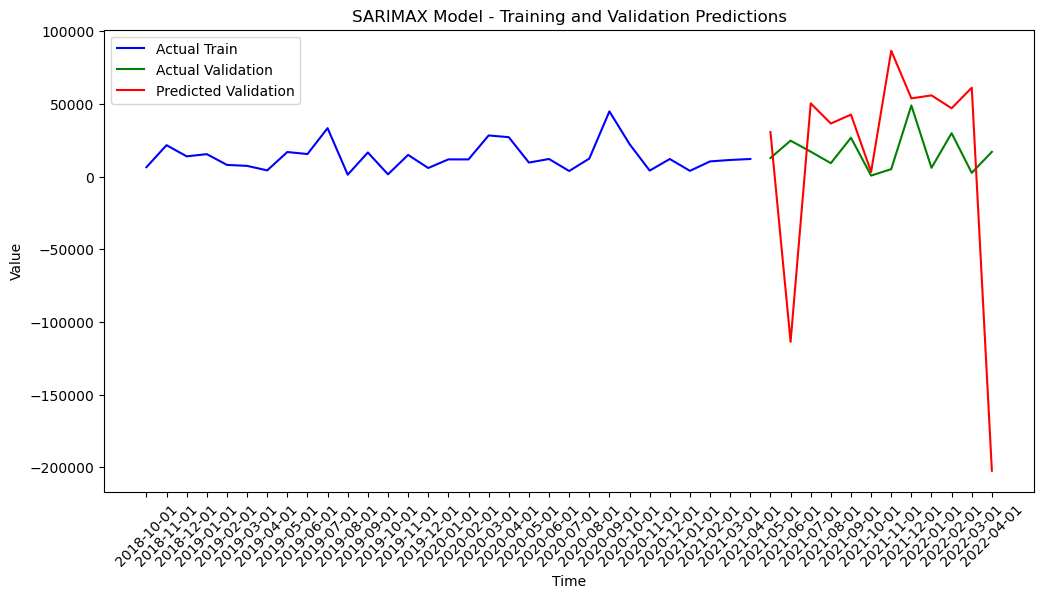

Results appended to ./results/36_results.csv

 Training model for Product Category 8


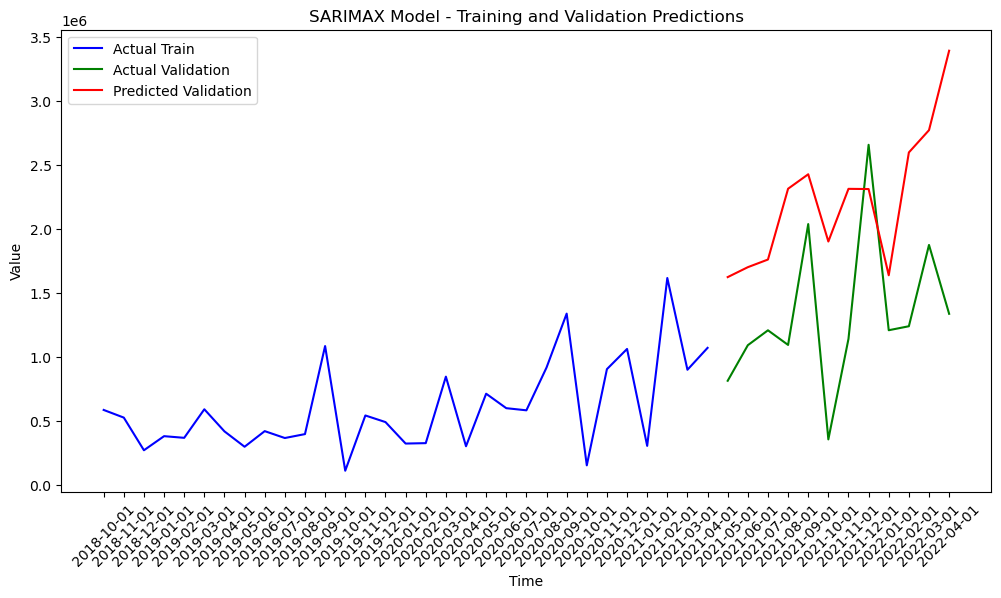

Results appended to ./results/8_results.csv

 Training model for Product Category 20


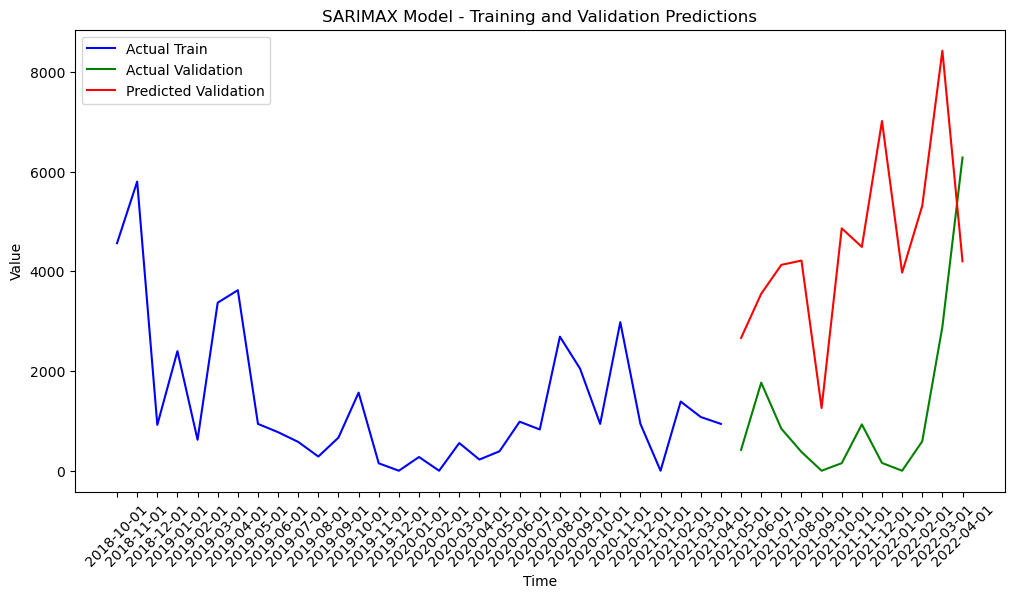

Results appended to ./results/20_results.csv

 Training model for Product Category 9


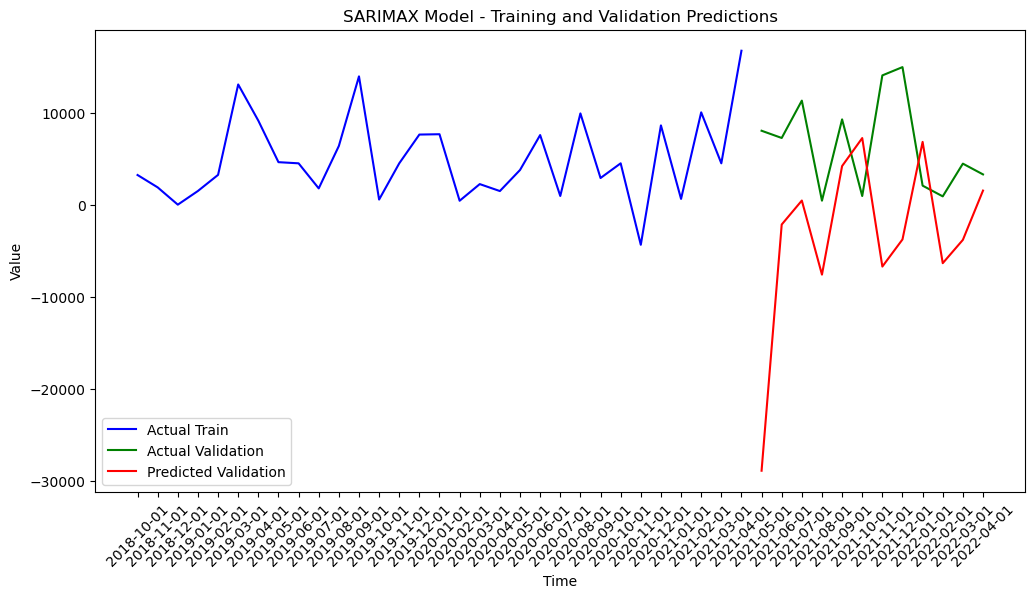

Results appended to ./results/9_results.csv

 Training model for Product Category 4


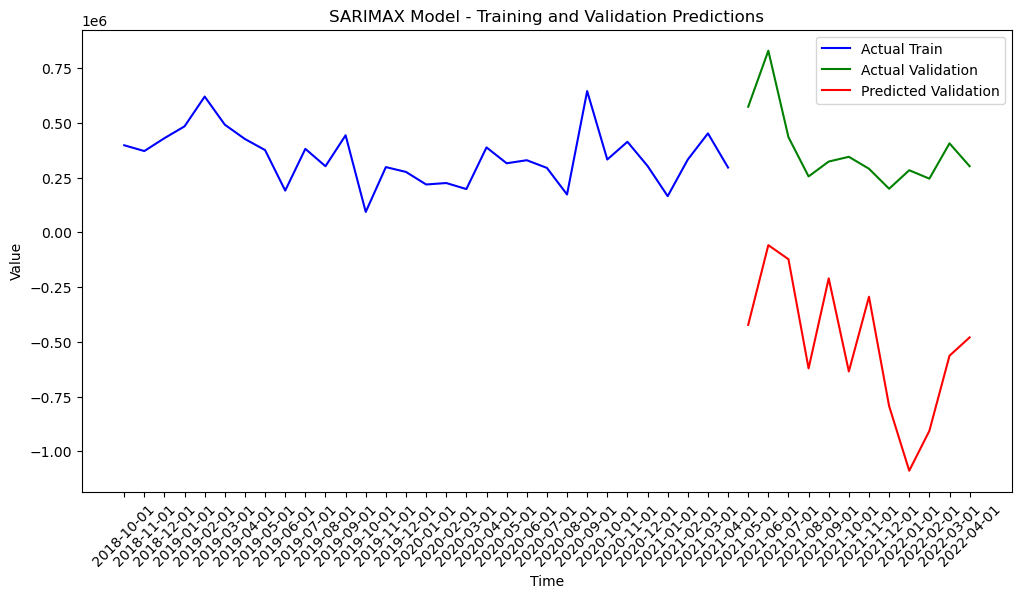

Results appended to ./results/4_results.csv

 Training model for Product Category 11


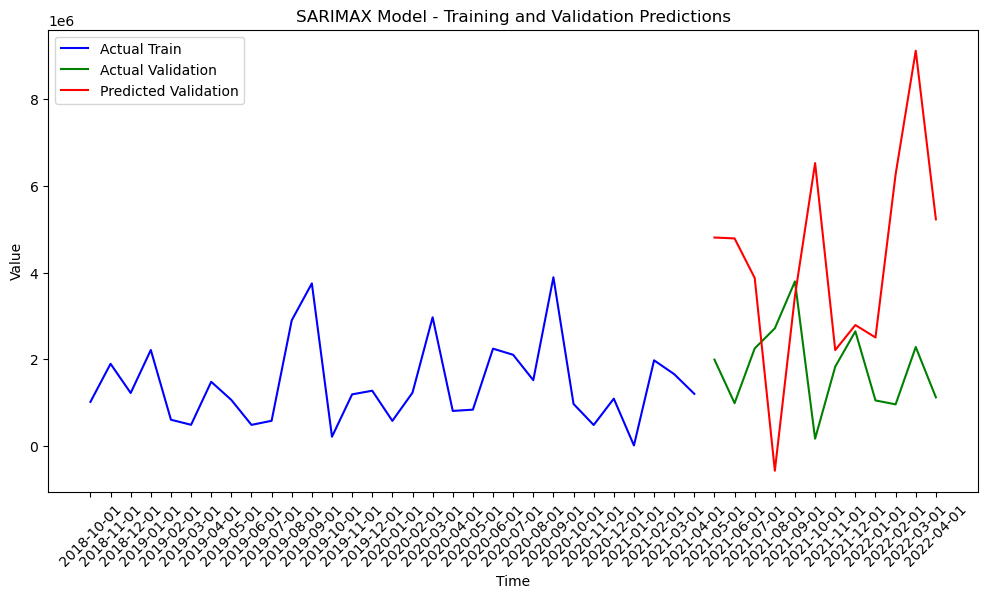

Results appended to ./results/11_results.csv

 Training model for Product Category 5


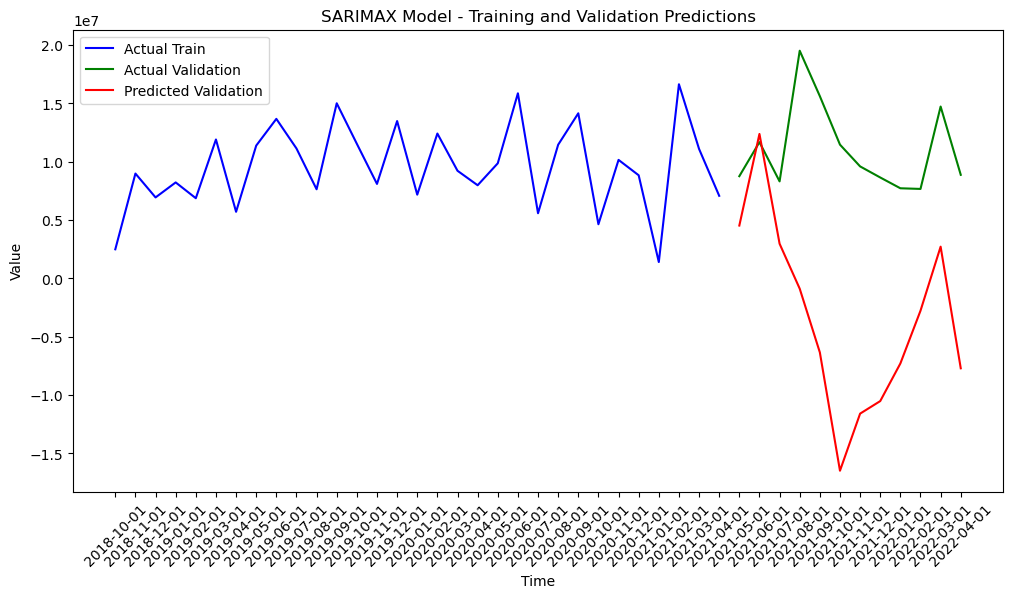

Results appended to ./results/5_results.csv

 Training model for Product Category 12


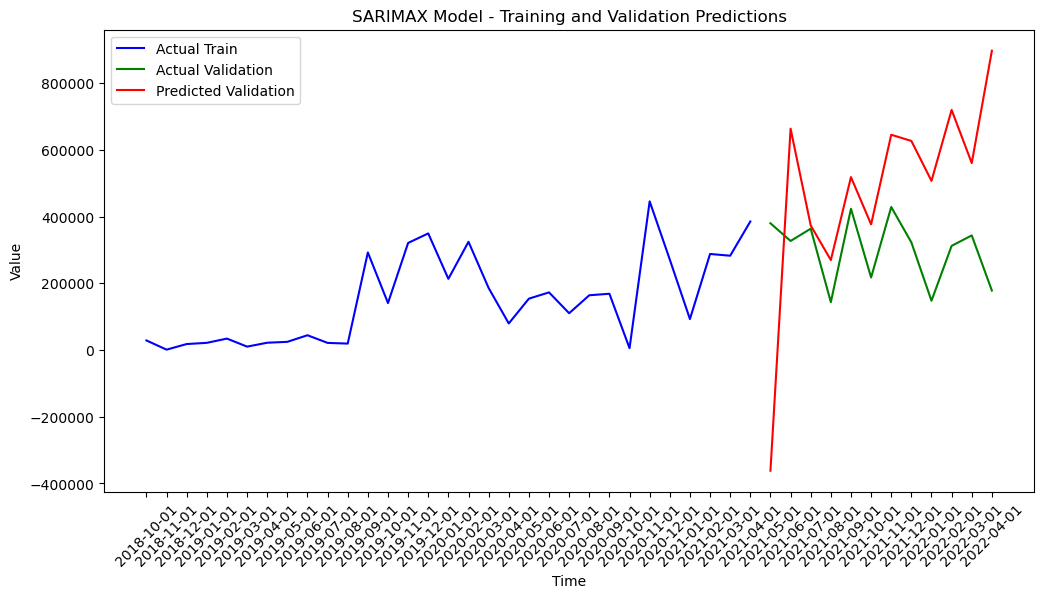

Results appended to ./results/12_results.csv

 Training model for Product Category 13


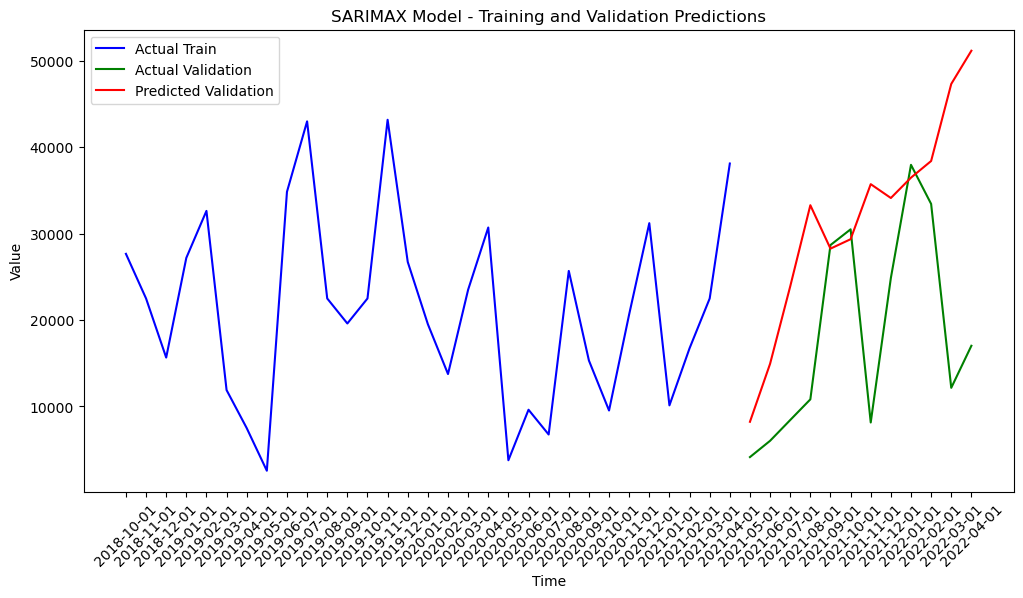

Results appended to ./results/13_results.csv

 Training model for Product Category 6


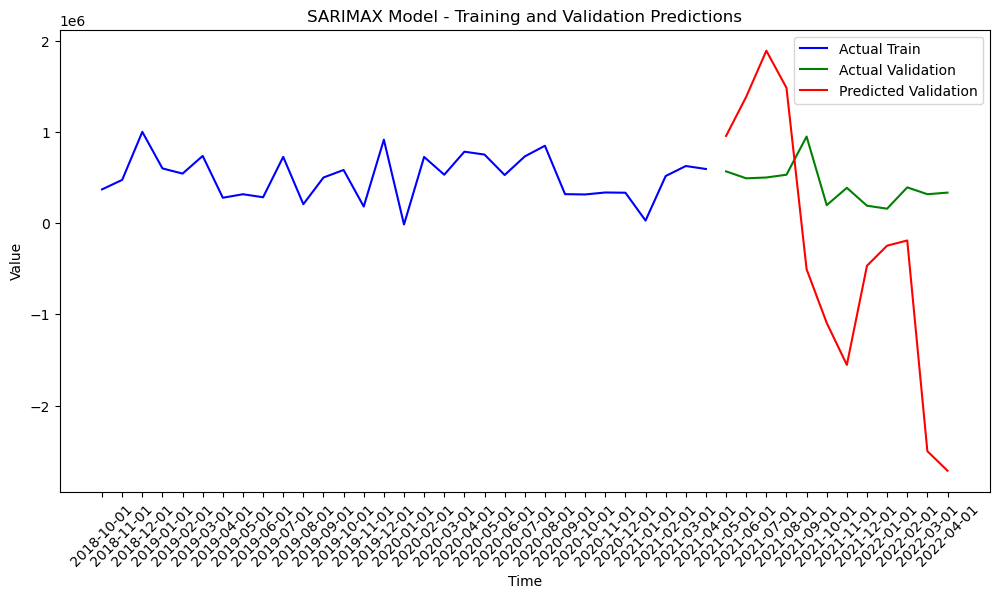

Results appended to ./results/6_results.csv

 Training model for Product Category 16


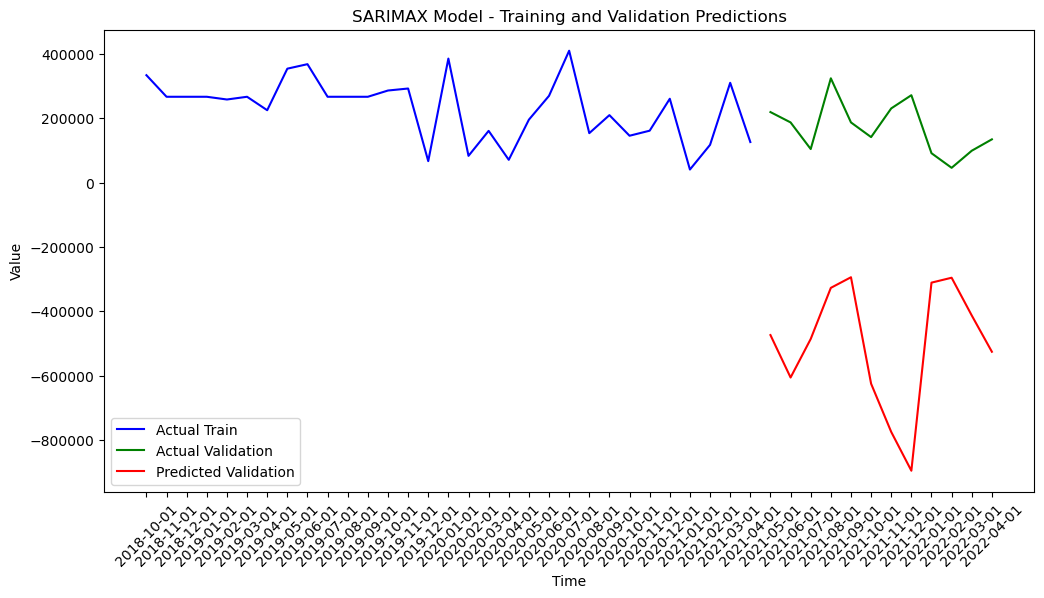

Results appended to ./results/16_results.csv

 Training model for Product Category 3


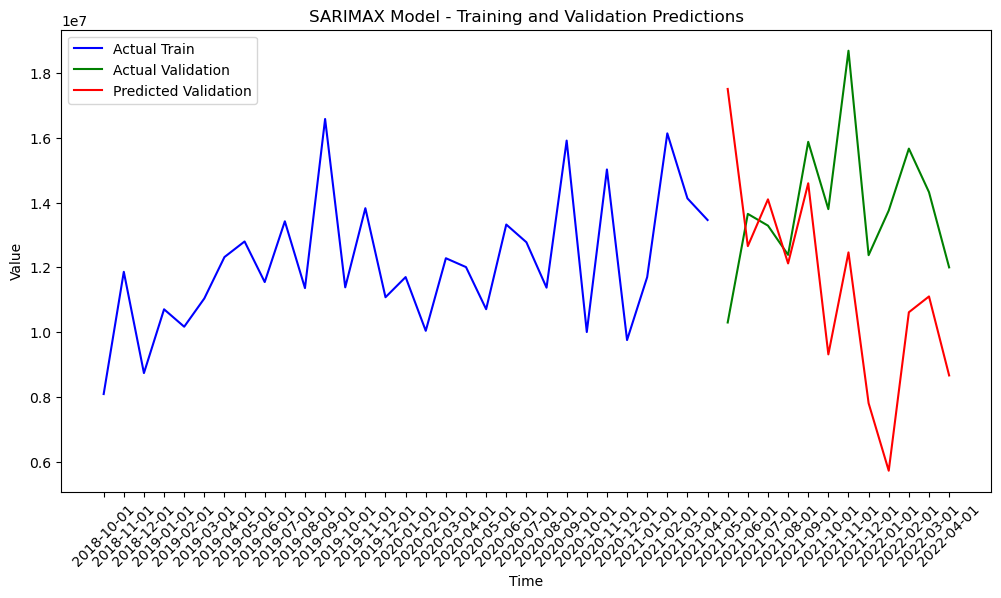

Results appended to ./results/3_results.csv

 Training model for Product Category 1


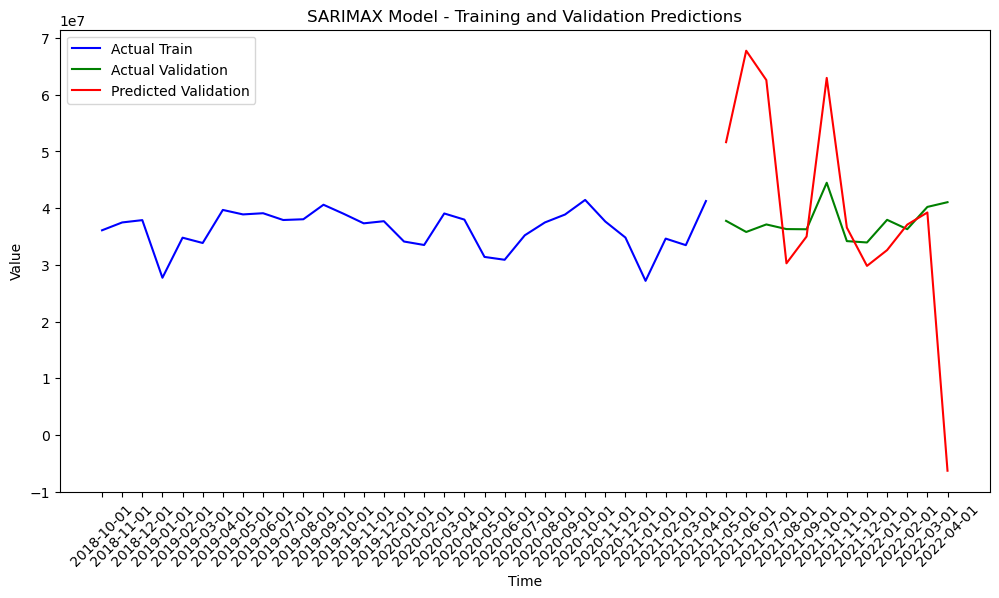

Results appended to ./results/1_results.csv

 Training model for Product Category 14


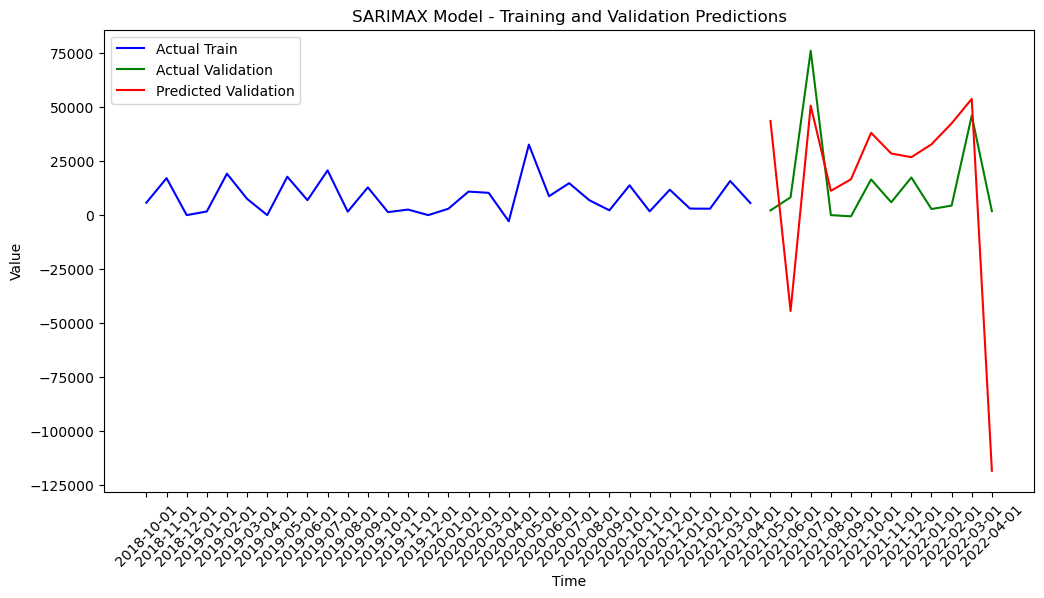

Results appended to ./results/14_results.csv


In [103]:
# Empty dicts
model_fits_sarx = {}
val_preds_sarx = {}
model_summaries_sarx = {}

# SARIMAX for all Product Categ
for target_name, selected_features in features.items():
    target_train = globals().get(f'y_train_{target_name.split("_")[-1]}')
    target_val = globals().get(f'y_val_{target_name.split("_")[-1]}')

    target_number = target_name.split('_')[-1]

    print(f'\n Training model for Product Category {target_number}')


    # Only selected features
    X_train_target = X_train_scaled[selected_features] 
    X_val_target = X_val_scaled[selected_features] 

    # Fit the SARIMAX model using fs.stats_models method
    model_fits_sarx[target_number], val_preds_sarx[target_number], model_summaries_sarx[target_number] = fs.stats_models(
        'sarimax', X_train_target, X_val_target, 
        target_train, target_val,
        plot=True,
        csv_path=f'./results/{target_number}_results.csv'
    )

### Prophet

12:02:33 - cmdstanpy - INFO - Chain [1] start processing
12:02:34 - cmdstanpy - INFO - Chain [1] done processing



 Training model for Product Category 36


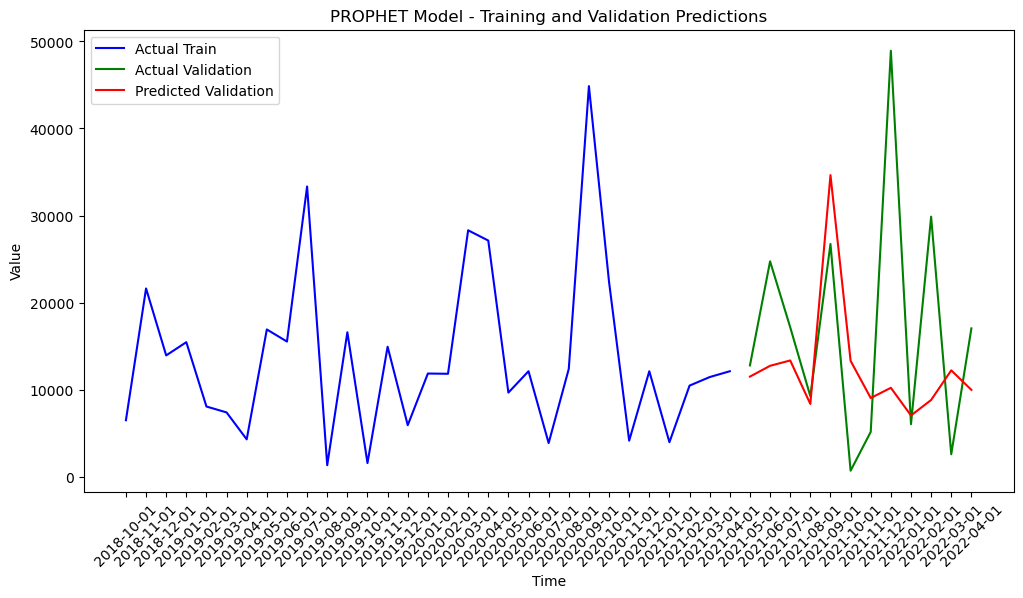

12:02:34 - cmdstanpy - INFO - Chain [1] start processing
12:02:34 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./results/36_results.csv

 Training model for Product Category 8


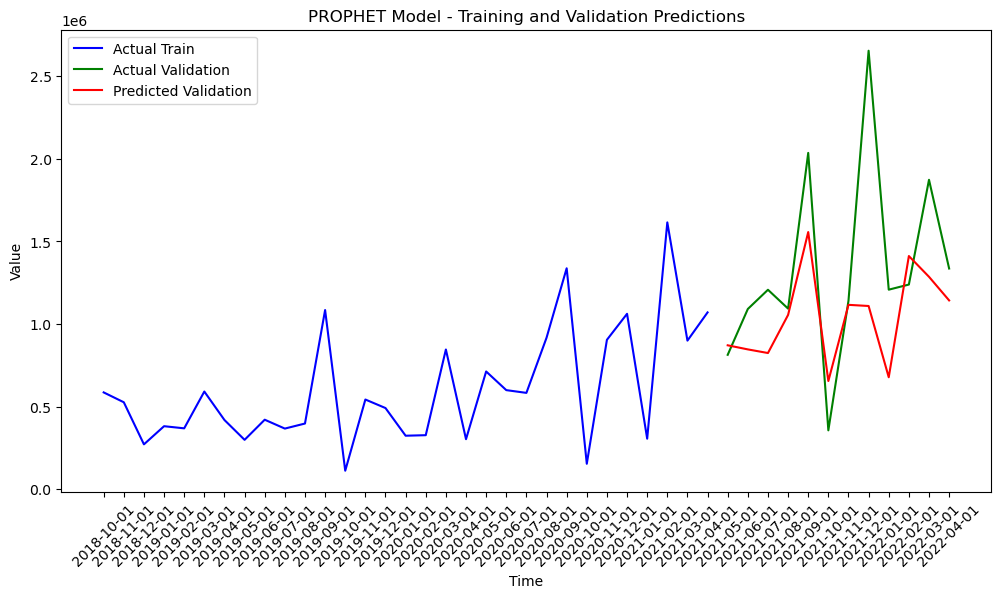

12:02:34 - cmdstanpy - INFO - Chain [1] start processing


Results appended to ./results/8_results.csv

 Training model for Product Category 20


12:02:35 - cmdstanpy - INFO - Chain [1] done processing


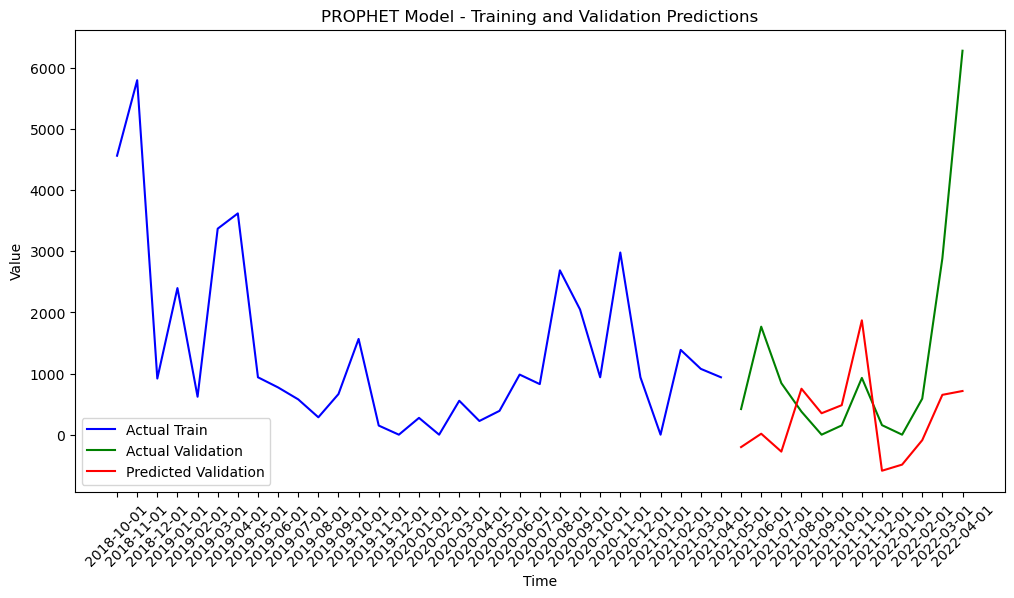

12:02:35 - cmdstanpy - INFO - Chain [1] start processing


Results appended to ./results/20_results.csv

 Training model for Product Category 9


12:02:35 - cmdstanpy - INFO - Chain [1] done processing


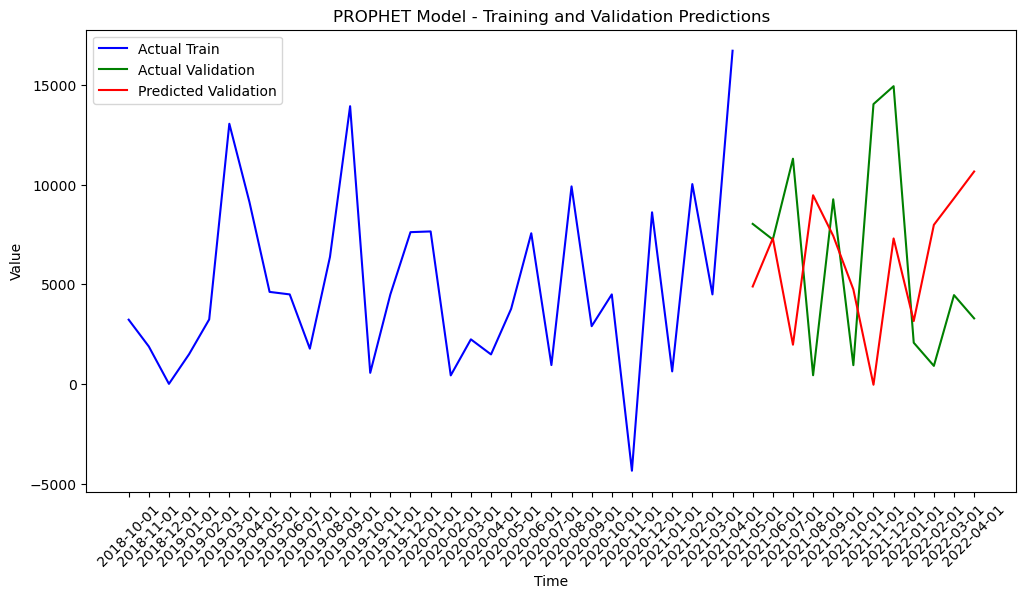

12:02:35 - cmdstanpy - INFO - Chain [1] start processing
12:02:36 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./results/9_results.csv

 Training model for Product Category 4


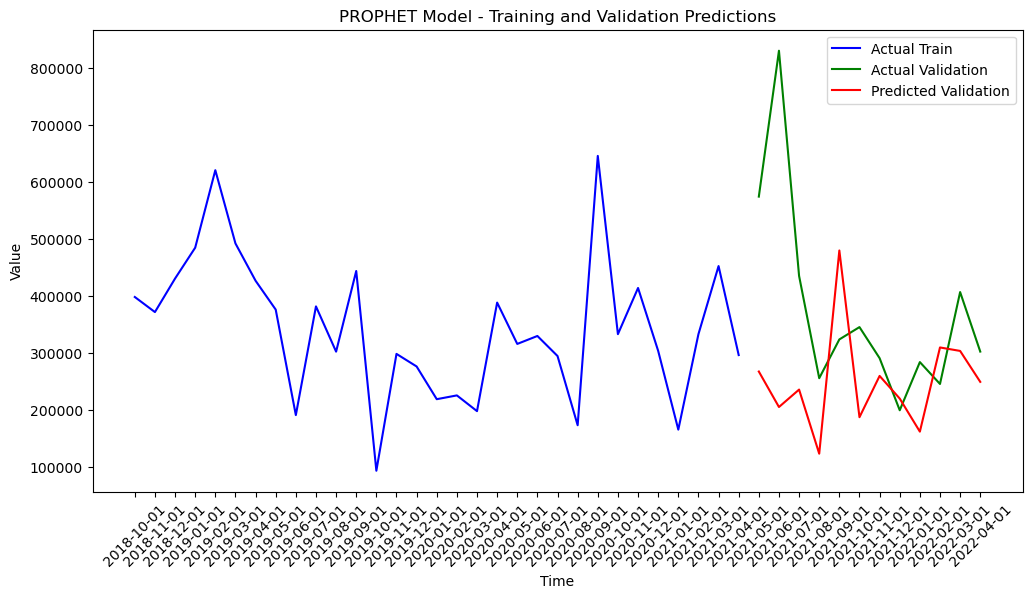

12:02:36 - cmdstanpy - INFO - Chain [1] start processing
12:02:36 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./results/4_results.csv

 Training model for Product Category 11


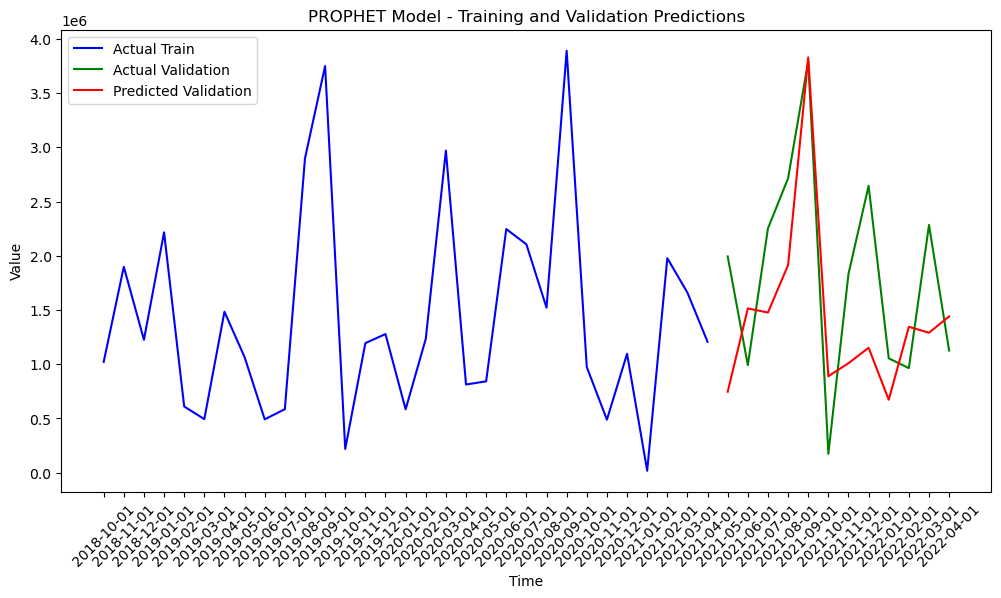

12:02:36 - cmdstanpy - INFO - Chain [1] start processing


Results appended to ./results/11_results.csv

 Training model for Product Category 5


12:02:37 - cmdstanpy - INFO - Chain [1] done processing


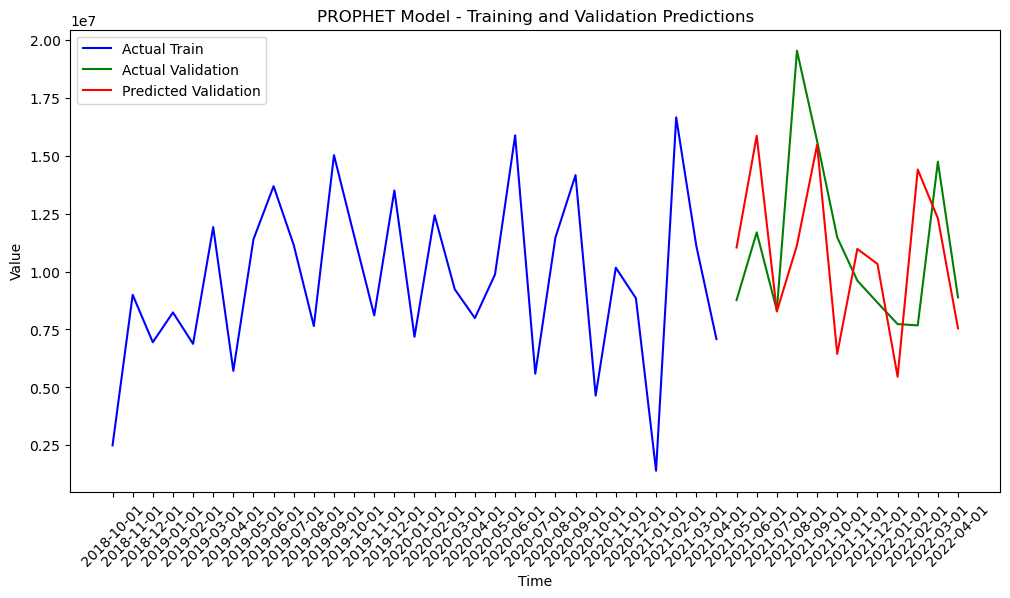

12:02:37 - cmdstanpy - INFO - Chain [1] start processing
12:02:37 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./results/5_results.csv

 Training model for Product Category 12


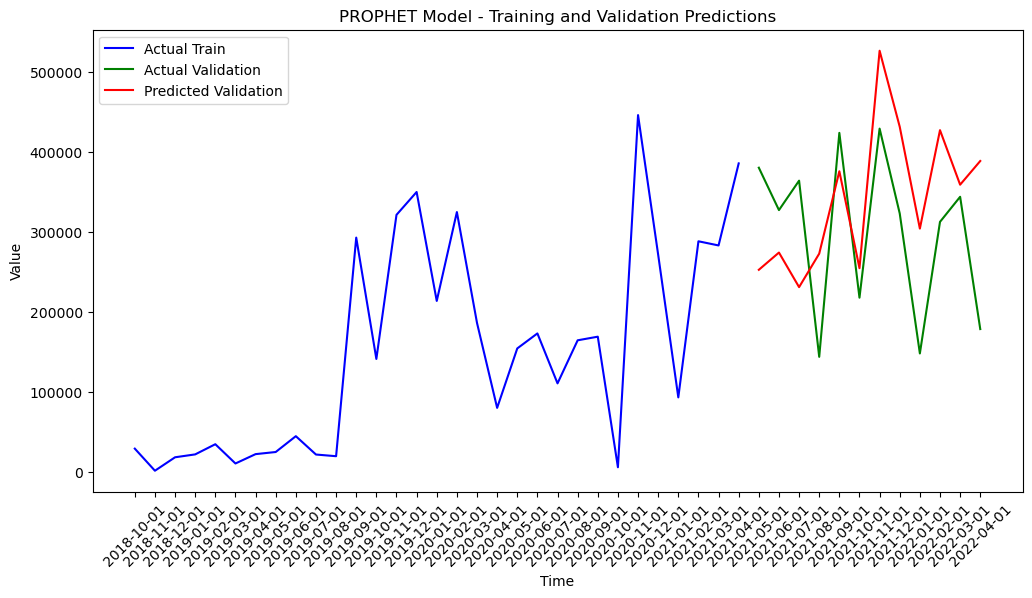

12:02:37 - cmdstanpy - INFO - Chain [1] start processing
12:02:37 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./results/12_results.csv

 Training model for Product Category 13


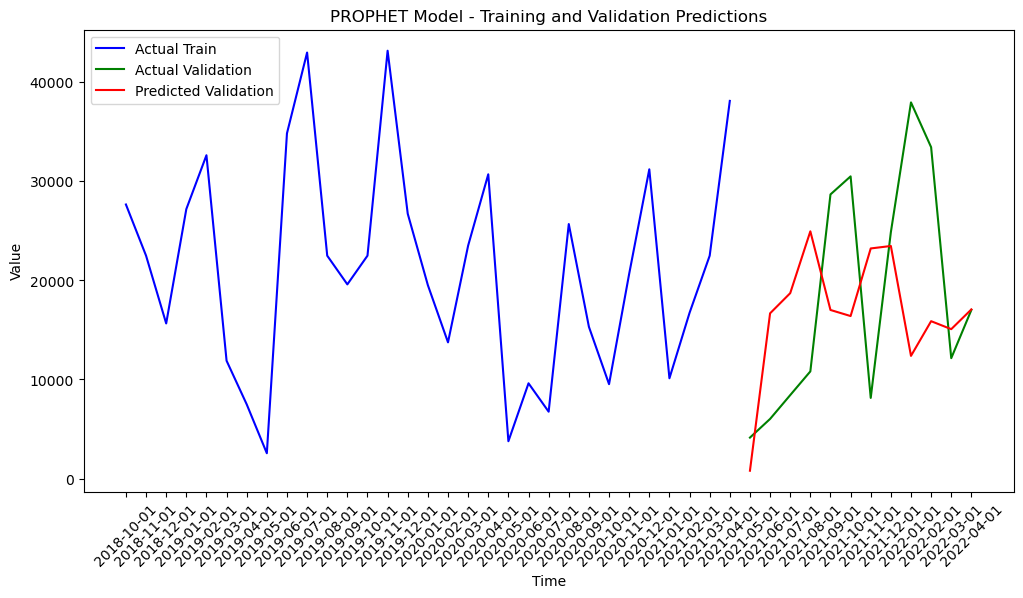

12:02:38 - cmdstanpy - INFO - Chain [1] start processing
12:02:38 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./results/13_results.csv

 Training model for Product Category 6


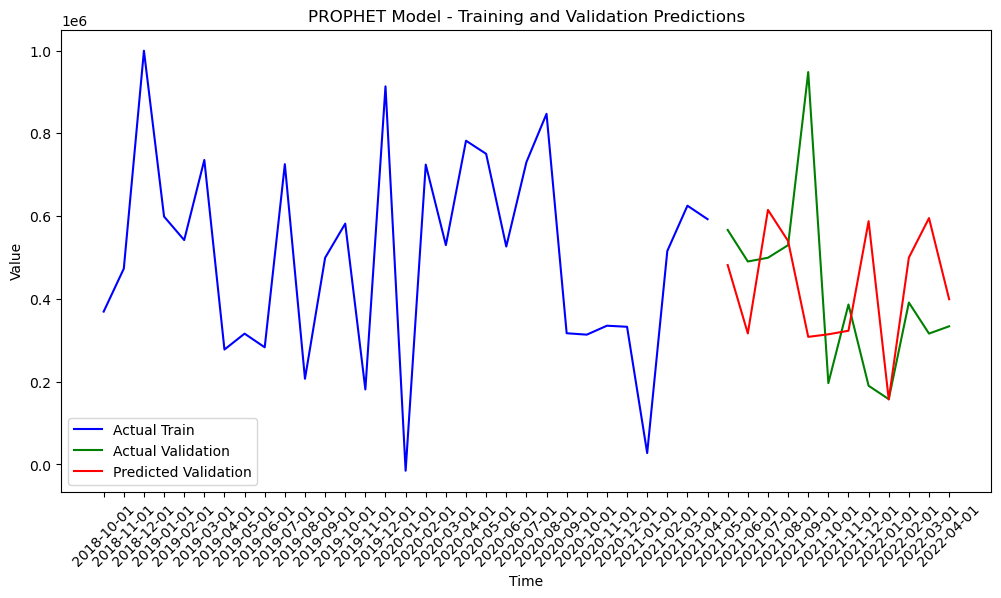

12:02:38 - cmdstanpy - INFO - Chain [1] start processing
12:02:38 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./results/6_results.csv

 Training model for Product Category 16


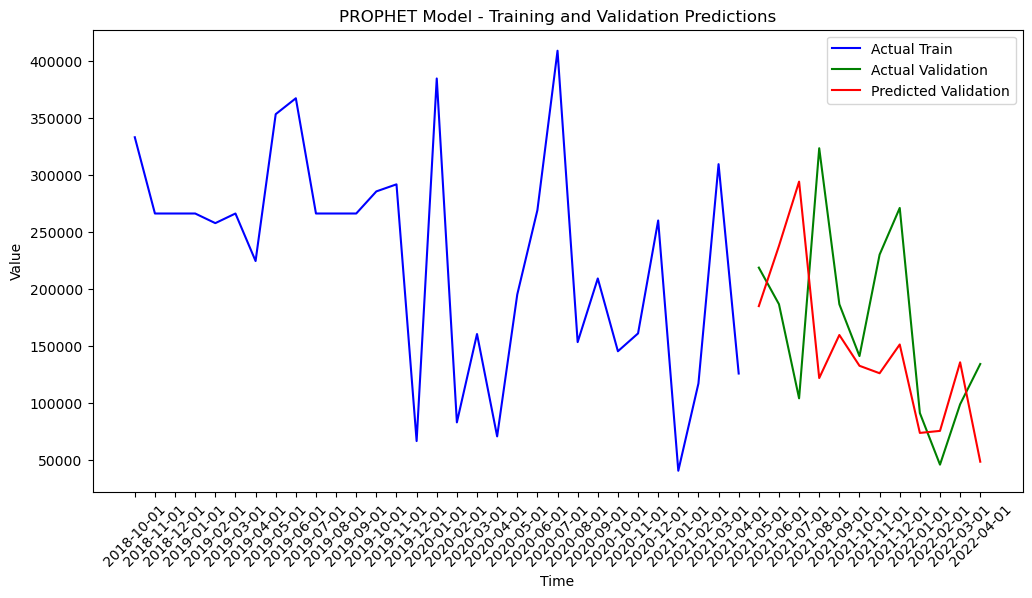

12:02:39 - cmdstanpy - INFO - Chain [1] start processing


Results appended to ./results/16_results.csv

 Training model for Product Category 3


12:02:39 - cmdstanpy - INFO - Chain [1] done processing


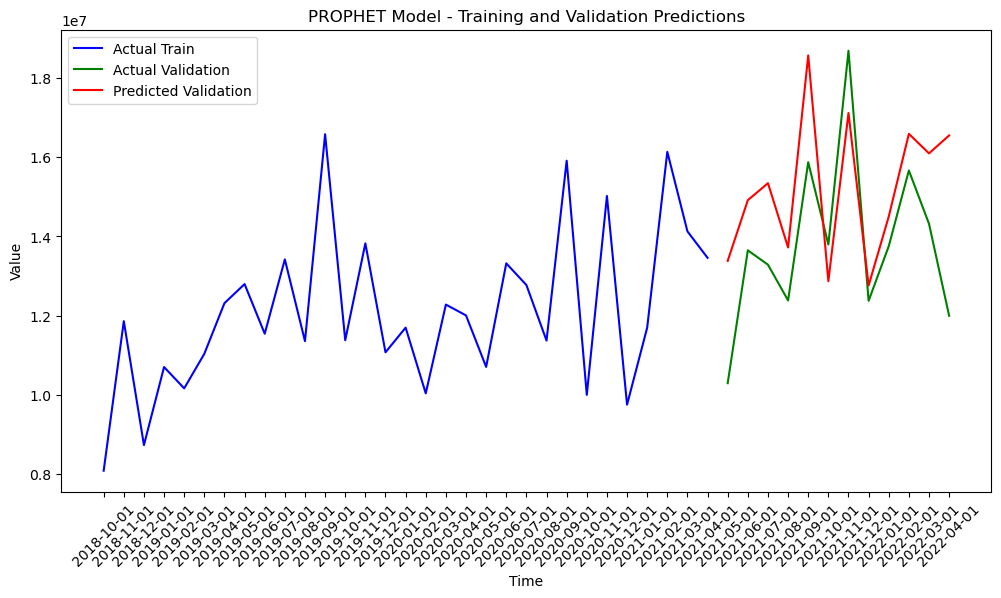

12:02:39 - cmdstanpy - INFO - Chain [1] start processing
12:02:39 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./results/3_results.csv

 Training model for Product Category 1


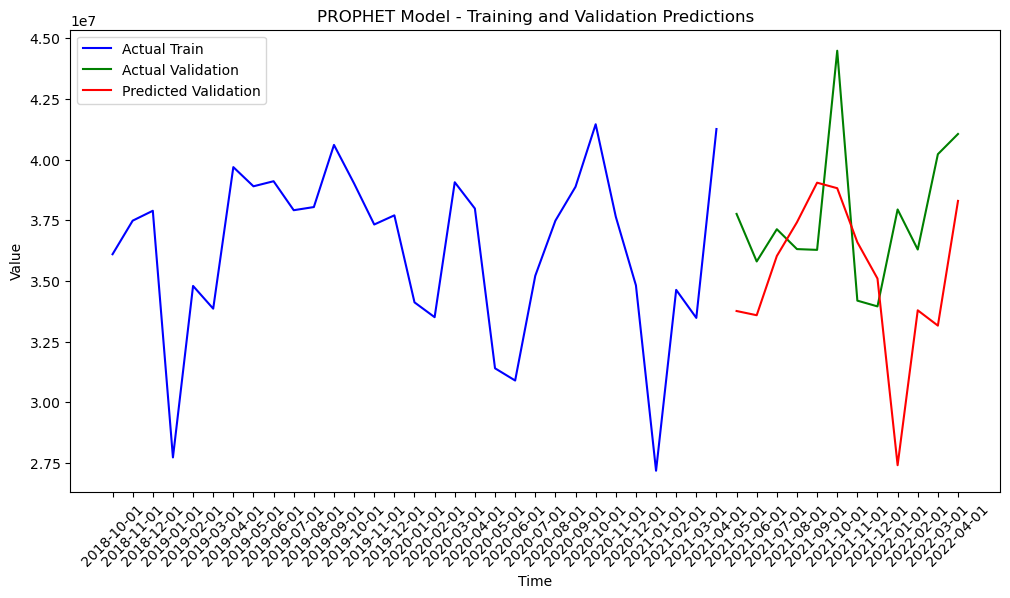

12:02:40 - cmdstanpy - INFO - Chain [1] start processing
12:02:40 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./results/1_results.csv

 Training model for Product Category 14


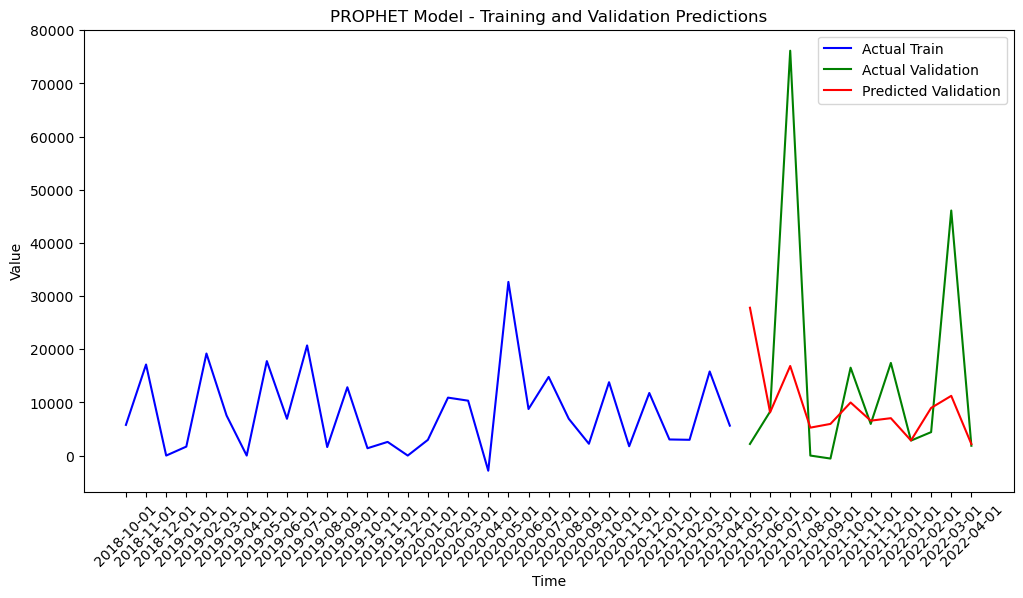

Results appended to ./results/14_results.csv


In [20]:
# Empty dicts
model_fits_p = {}
val_preds_p = {}

# ARIMA for all Product Categ
for target_name, selected_features in features.items():
    target_train = globals().get(f'y_train_{target_name.split("_")[-1]}')
    target_val = globals().get(f'y_val_{target_name.split("_")[-1]}')

    target_number = target_name.split('_')[-1]

    print(f'\n Training model for Product Category {target_number}')

    # Fit the Prophet model using fs.stats_models method
    model_fits_p[target_number], val_preds_p[target_number] = fs.stats_models(
        'prophet', X_train_scaled, X_val_scaled, 
        target_train, target_val,
        plot=True,
        csv_path=f'./results/{target_number}_results.csv'
    )

In [17]:
#model_fit_prof, val_preds_prof = fs.stats_models('prophet', X_train, X_val, 
#                                 y_train_1, y_val_1, order=(1,1,3),
#                                 plot = True, 
#                                 csv_path = './modelling_csvs/test3.csv')

In [27]:
future_dates = pd.date_range(start='2022-04-01', periods=10, freq='M')
future_df = pd.DataFrame({'ds': future_dates})

future_preds = model_fits_p['1'].predict(future_df) 
print(future_preds[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


          ds        yhat  yhat_lower  yhat_upper
0 2022-04-30 44230037.57 38236430.29 50195221.98
1 2022-05-31 44817559.25 38262593.71 51113067.81
2 2022-06-30 39046571.73 32798011.67 45652346.06
3 2022-07-31 39269534.84 33088050.45 45441356.87
4 2022-08-31 44791293.36 39279468.81 51409805.39
5 2022-09-30 39676180.20 33917216.39 45325386.93
6 2022-10-31 23836799.98 18054527.25 29183484.47
7 2022-11-30 49328602.69 43511678.07 55862069.39
8 2022-12-31 44519513.59 37965481.63 50569606.66
9 2023-01-31 36230834.58 30094027.74 42662814.91


### ML Models

In [27]:
model_fits = {}
val_preds = {}

for target_name, selected_features in features.items():
    model = XGBRegressor()  

    target_train = globals().get(f'y_train_{target_name.split("_")[-1]}')
    target_val = globals().get(f'y_val_{target_name.split("_")[-1]}')
    target_number = target_name.split('_')[-1]

    print(f'\n Training model for Product Category {target_number}')

    X_train_target = X_train_scaled[selected_features] 
    X_val_target = X_val_scaled[selected_features] 

    model_fits[target_number], val_preds[target_number] = fs.all_models(
        model,
        X_train_target, X_val_target, 
        target_train, target_val,
        plot=False,
        csv_path=f'./results/{target_number}_results.csv', 
    )


 Training model for Product Category 36
Results appended to ./results/36_results.csv

 Training model for Product Category 8
Results appended to ./results/8_results.csv

 Training model for Product Category 20
Results appended to ./results/20_results.csv

 Training model for Product Category 9
Results appended to ./results/9_results.csv

 Training model for Product Category 4
Results appended to ./results/4_results.csv

 Training model for Product Category 11
Results appended to ./results/11_results.csv

 Training model for Product Category 5
Results appended to ./results/5_results.csv

 Training model for Product Category 12
Results appended to ./results/12_results.csv

 Training model for Product Category 13
Results appended to ./results/13_results.csv

 Training model for Product Category 6
Results appended to ./results/6_results.csv

 Training model for Product Category 16
Results appended to ./results/16_results.csv

 Training model for Product Category 3
Results appended to ./re

# 4. Results Comparison

In [6]:
folder_path = './results'  
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

results = []

for file in csv_files:
    var_name = os.path.splitext(file)[0]  
    var_name = re.sub(r"^\d", r"pc\g<0>", var_name)  

    # Read the CSV
    df = pd.read_csv(os.path.join(folder_path, file))

    # Drop duplicates
    df = df.drop_duplicates()

    # Save DFs
    globals()[var_name] = df  
    
    results.append(var_name)

    print(var_name) 

pc4_results
pc8_results
pc1_results
pc16_results
pc13_results
pc14_results
pc9_results
pc36_results
pc5_results
pc11_results
pc12_results
pc20_results
pc6_results
pc3_results


In [55]:
for df_name in results:
    df = globals()[df_name]

    df = df.reset_index(drop=False)

    # Smallest RMSE
    smallest_train_rmse_idx = df['train_rmse'].idxmin()
    smallest_val_rmse_idx = df['val_rmse'].idxmin()
    
    smallest_train_rmse_row = df.loc[smallest_train_rmse_idx]
    smallest_val_rmse_row = df.loc[smallest_val_rmse_idx]

    print(f"Smallest val_rmse row in {df_name}:")
    print(f"Index of row: {smallest_val_rmse_idx}")
    print(smallest_val_rmse_row)
    print('')
    print(f"Smallest train_rmse row in {df_name}:")
    print(f"Index of row: {smallest_train_rmse_idx}")
    print(smallest_train_rmse_row)


Smallest val_rmse row in pc4_results:
Index of row: 9
index                                                            12
model_type                            HistGradientBoostingRegressor
features_used     ['#1_Lag_1', 'CHI Production Index_Lag_12', '#...
model_params                                                     {}
train_rmse                                                123369.68
val_rmse                                                  170244.87
train_mape (%)                                                37.56
val_mape (%)                                                  28.55
Name: 9, dtype: object

Smallest train_rmse row in pc4_results:
Index of row: 10
index                                                            13
model_type                                             XGBRegressor
features_used     ['#1_Lag_1', 'CHI Production Index_Lag_12', '#...
model_params                                                     {}
train_rmse                                       

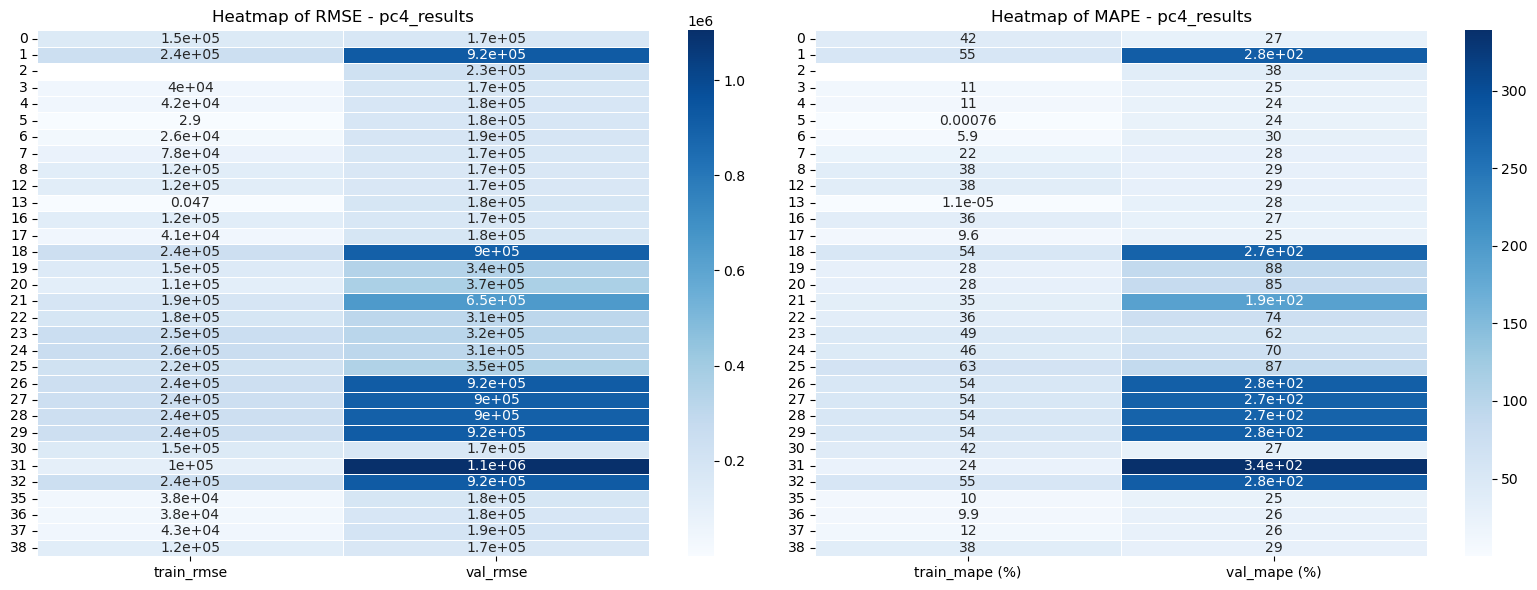

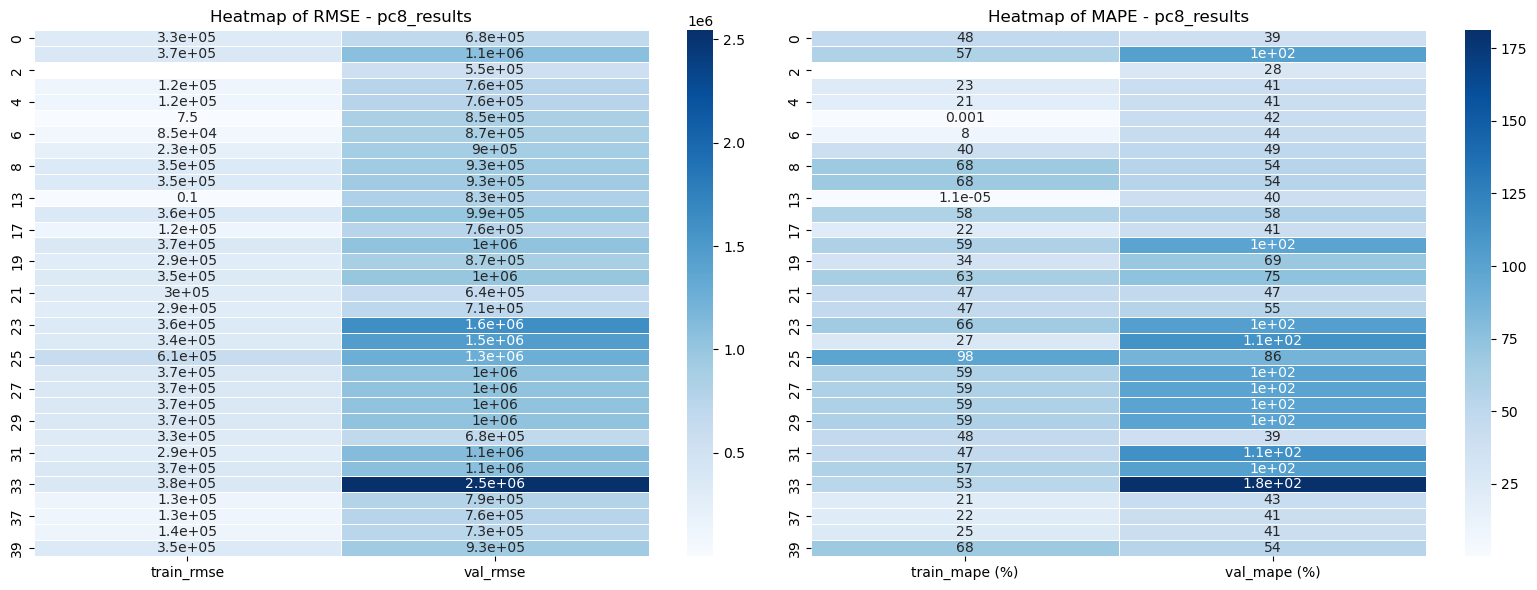

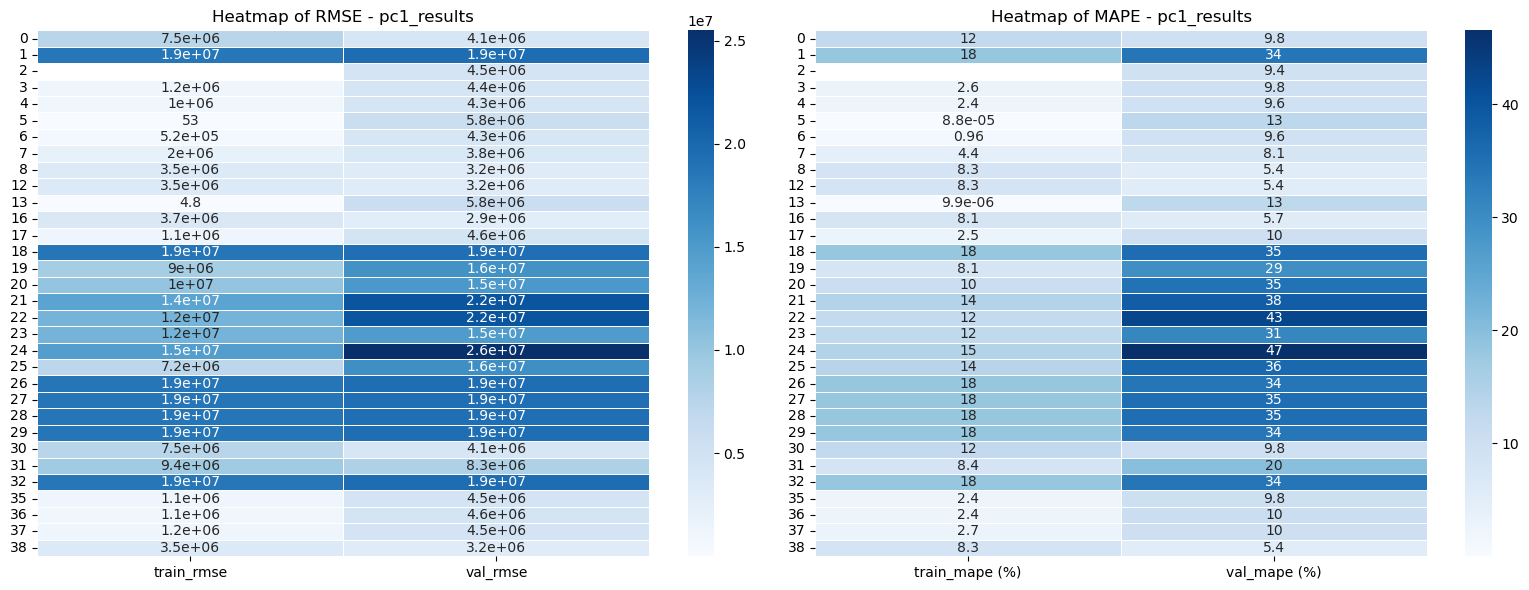

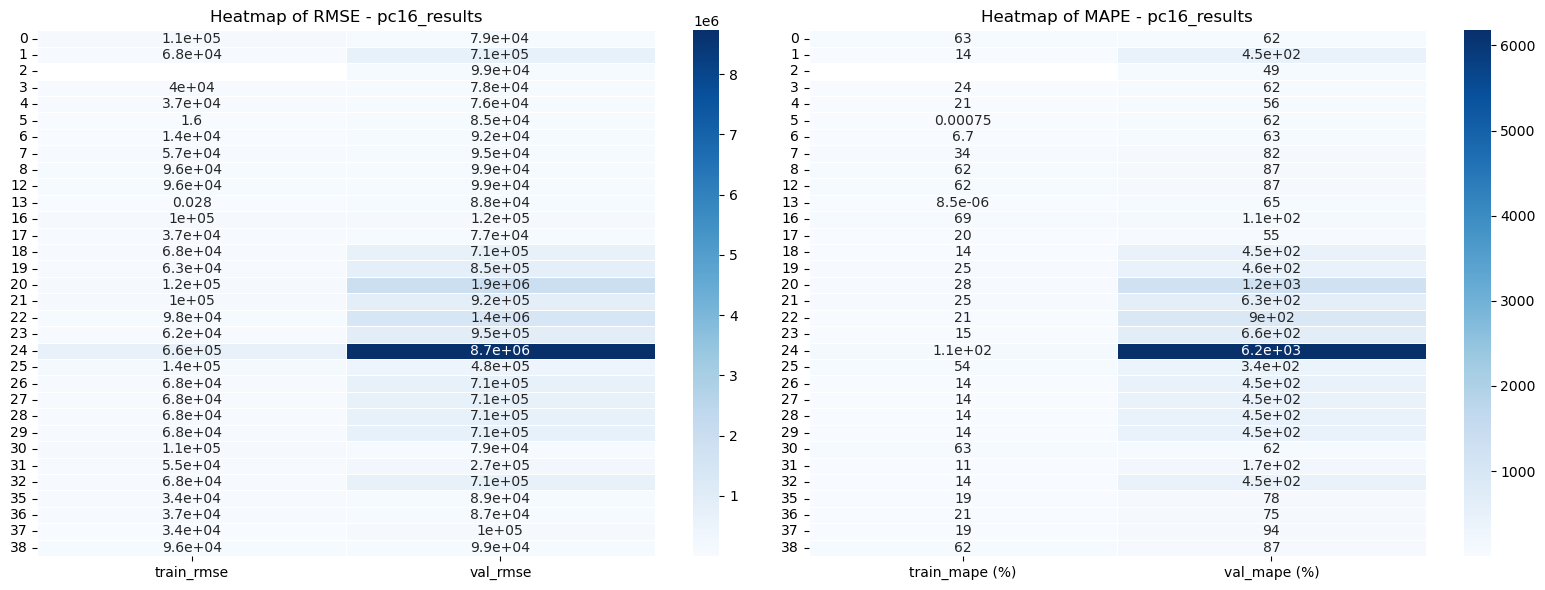

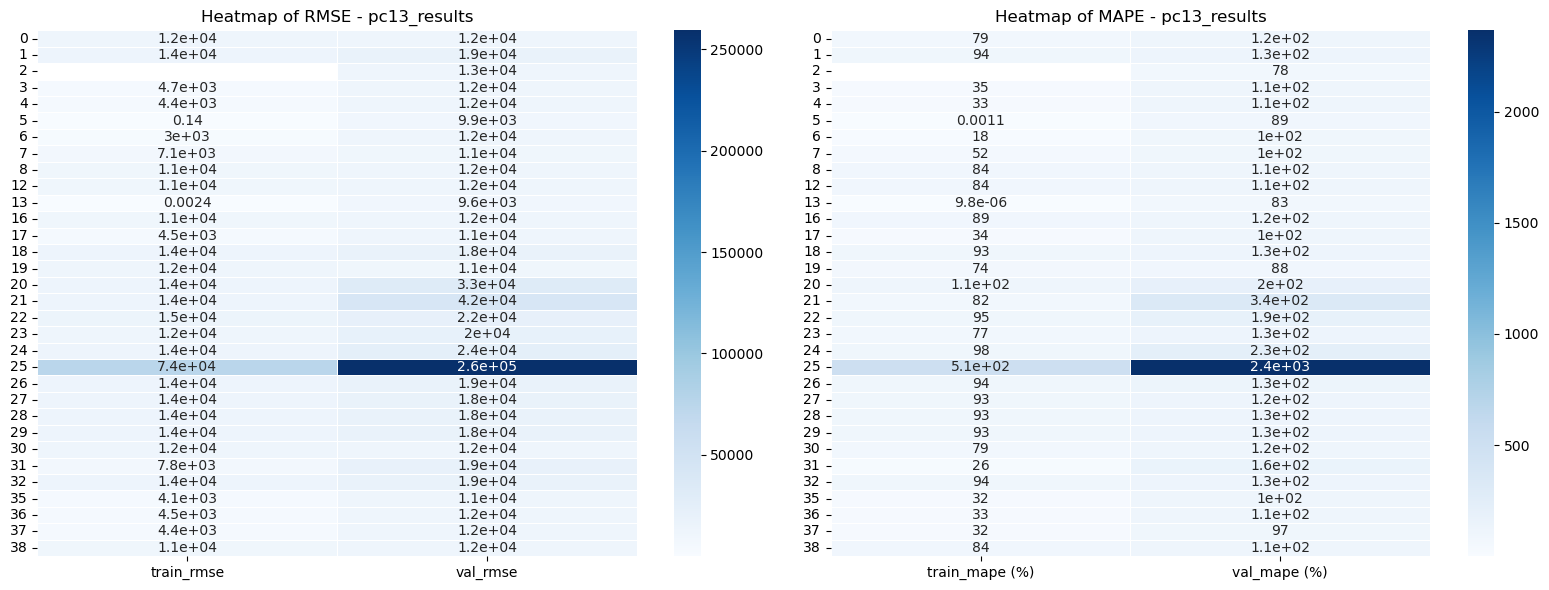

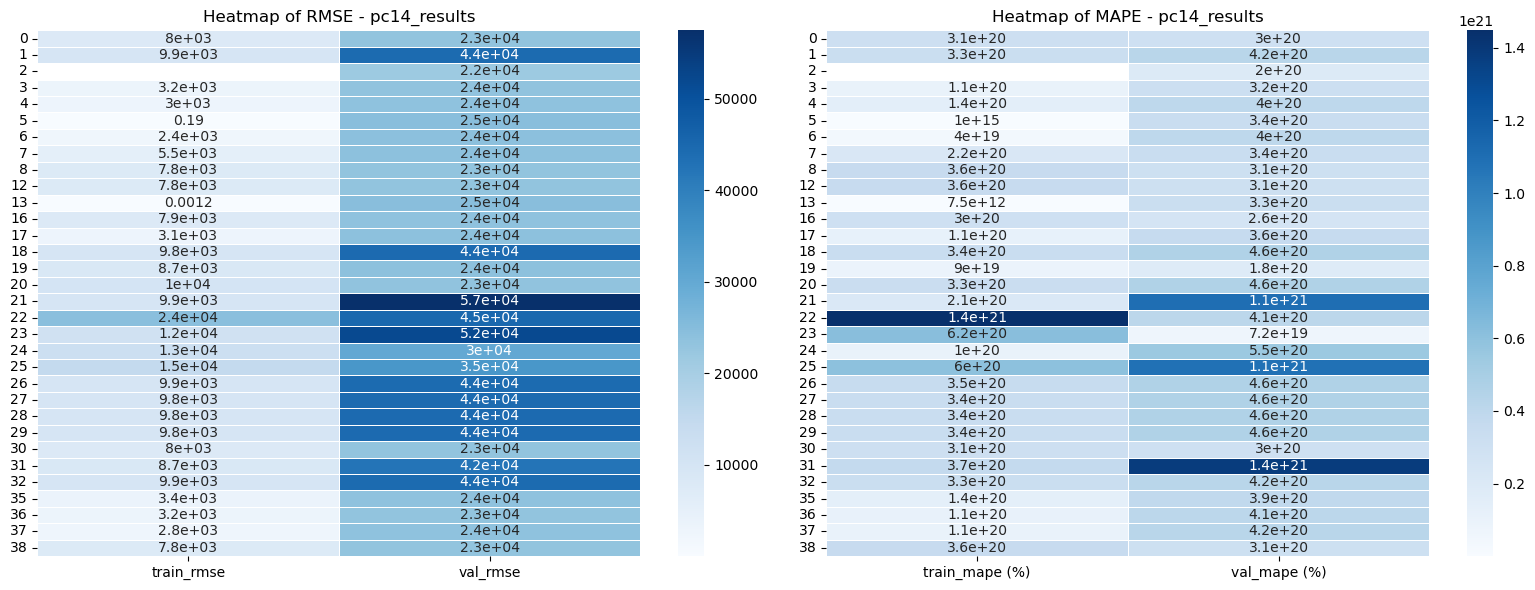

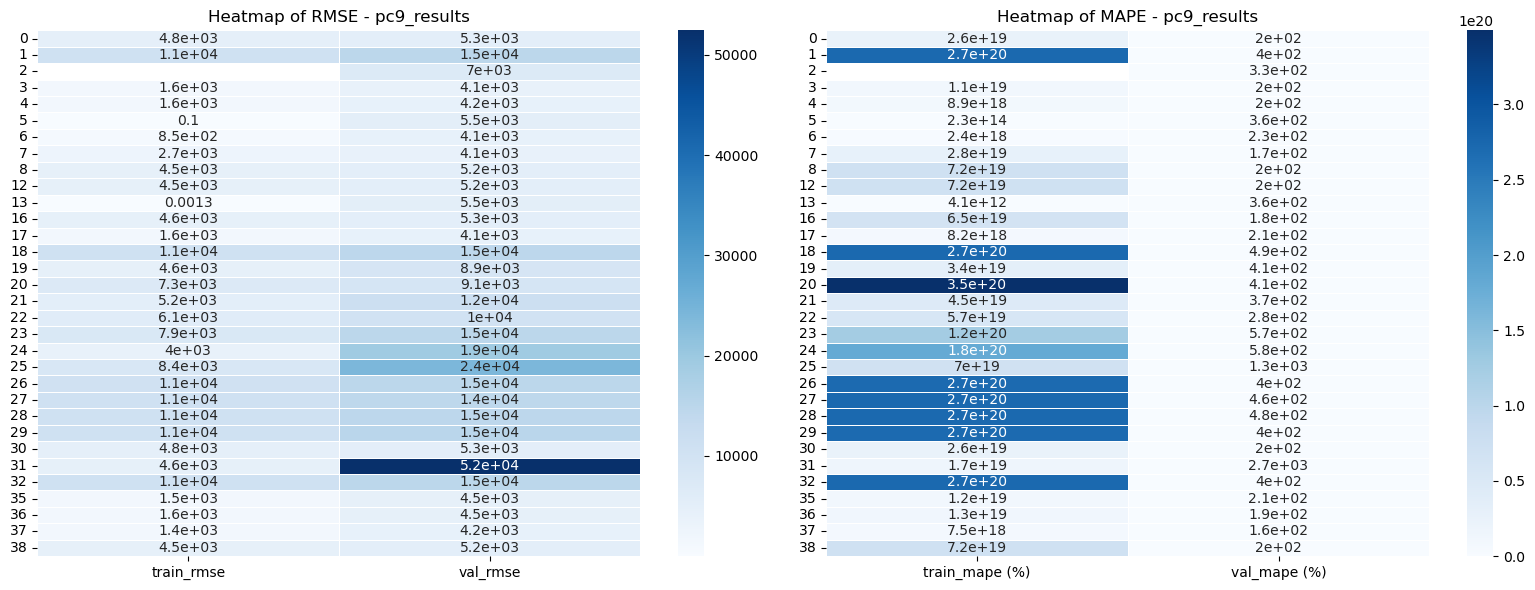

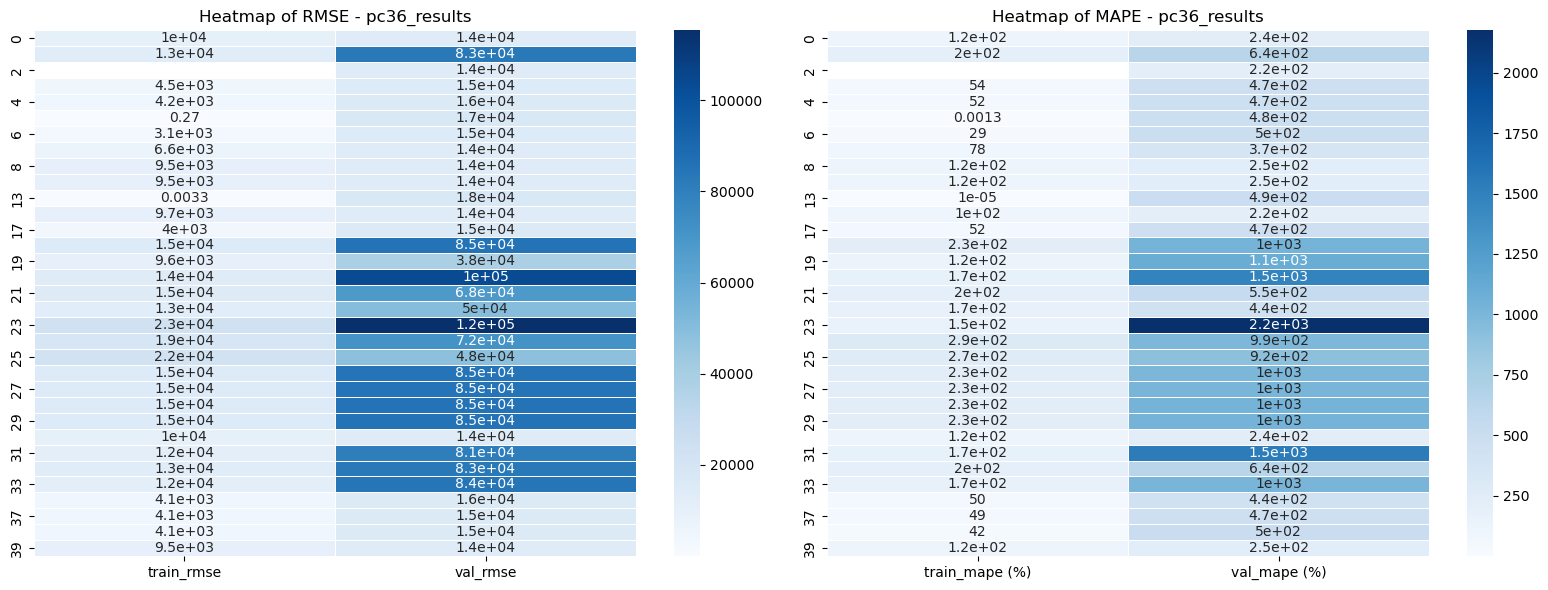

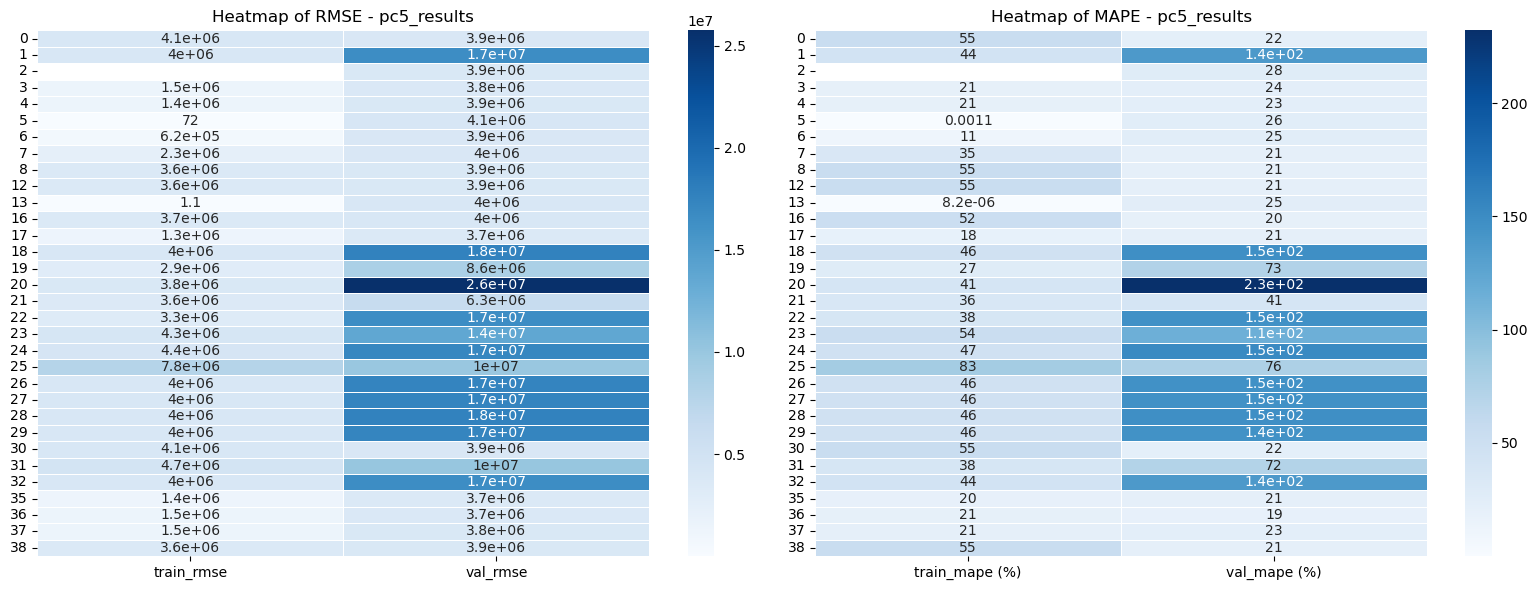

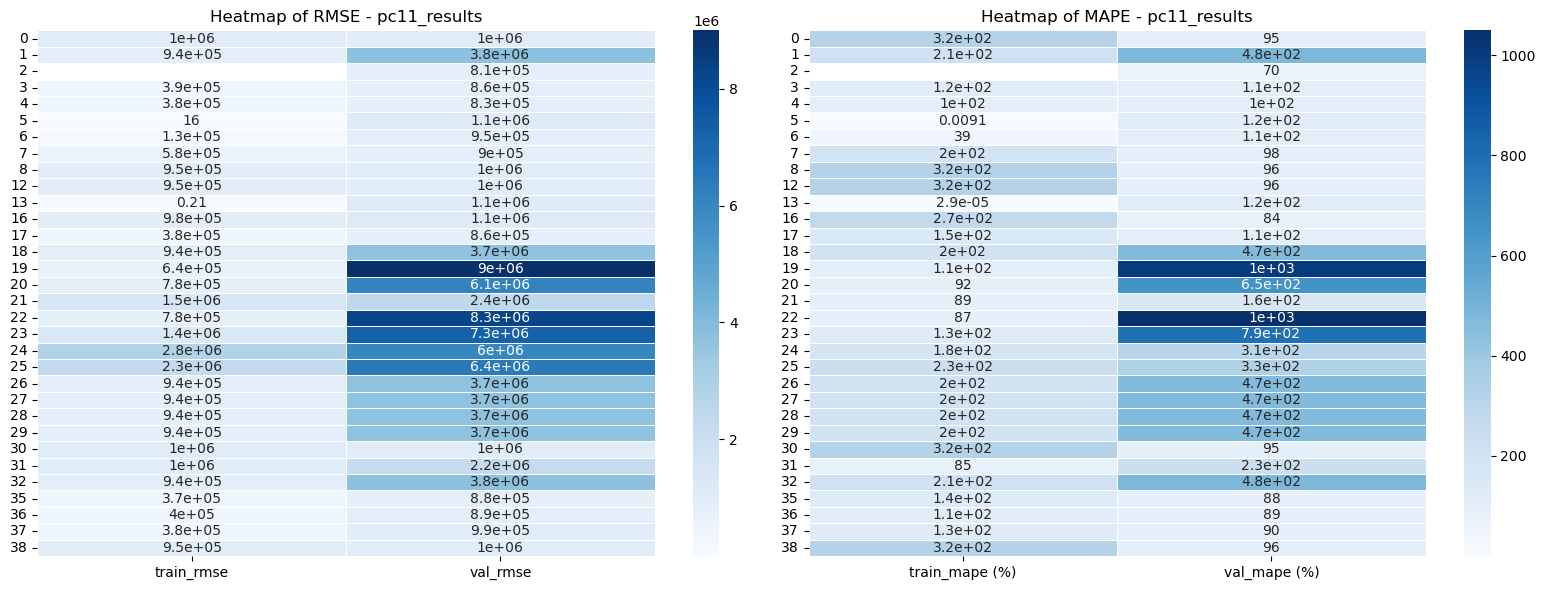

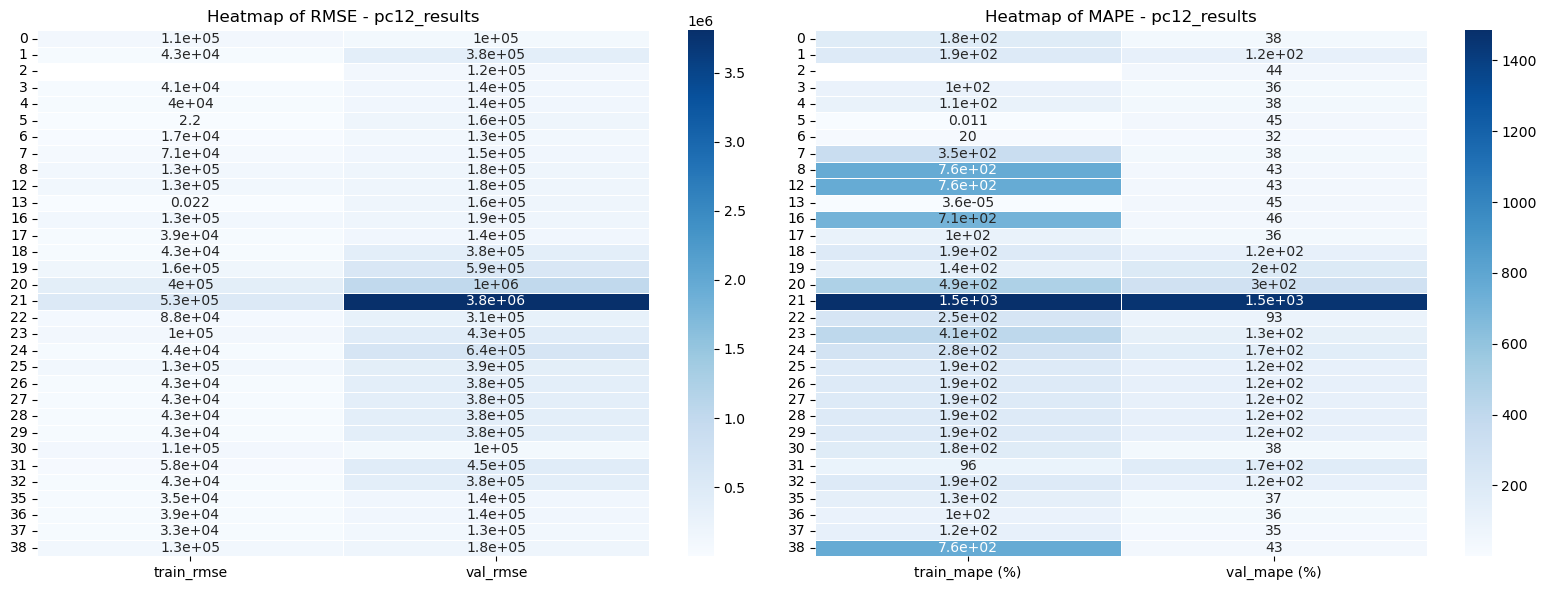

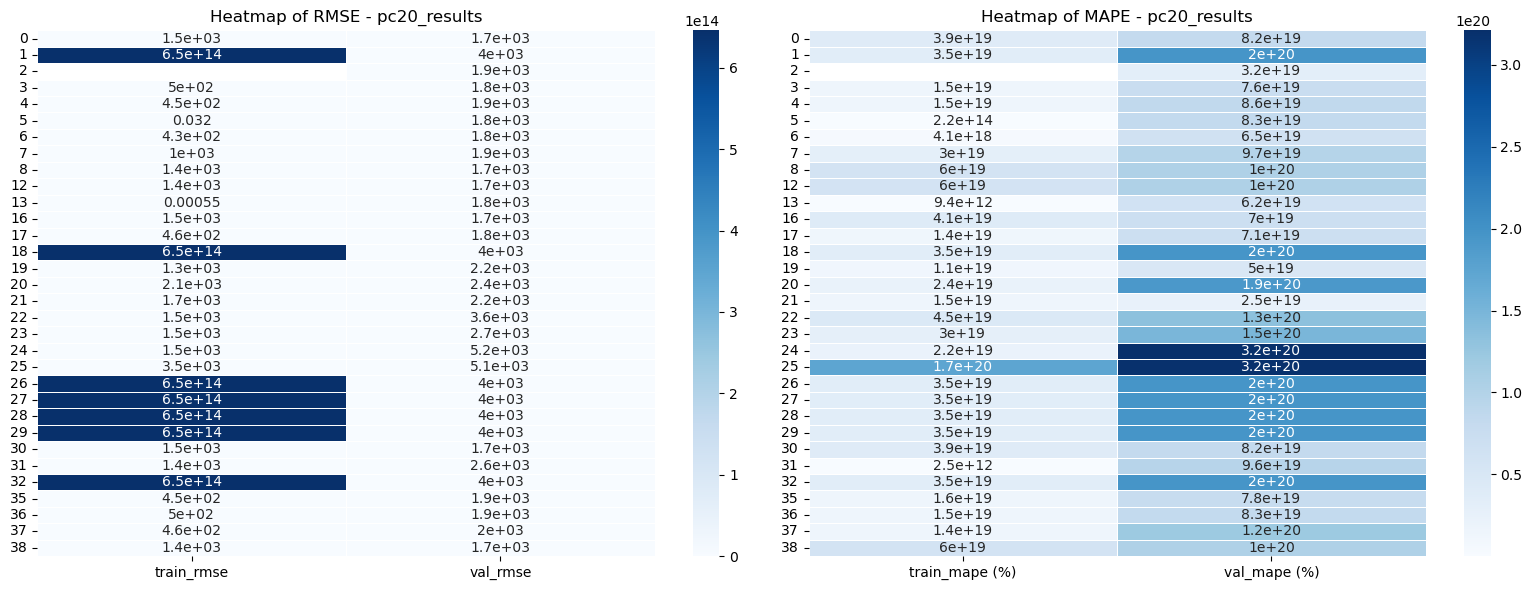

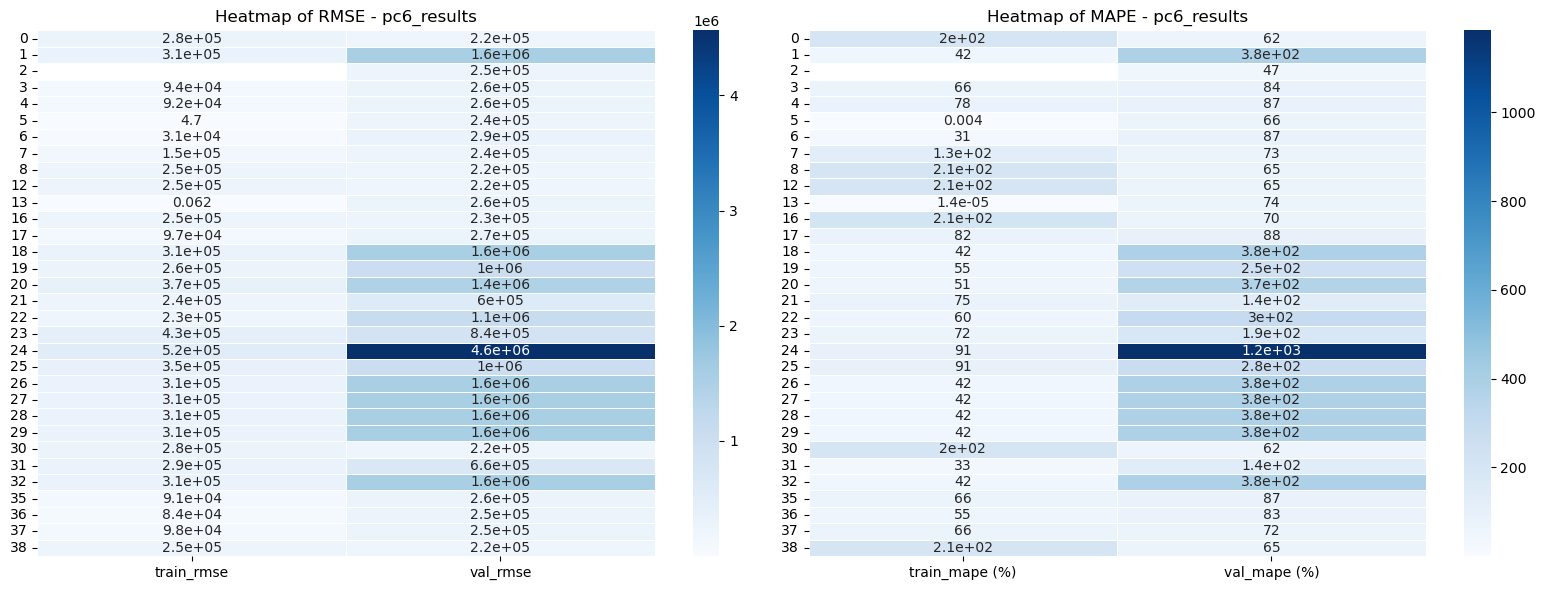

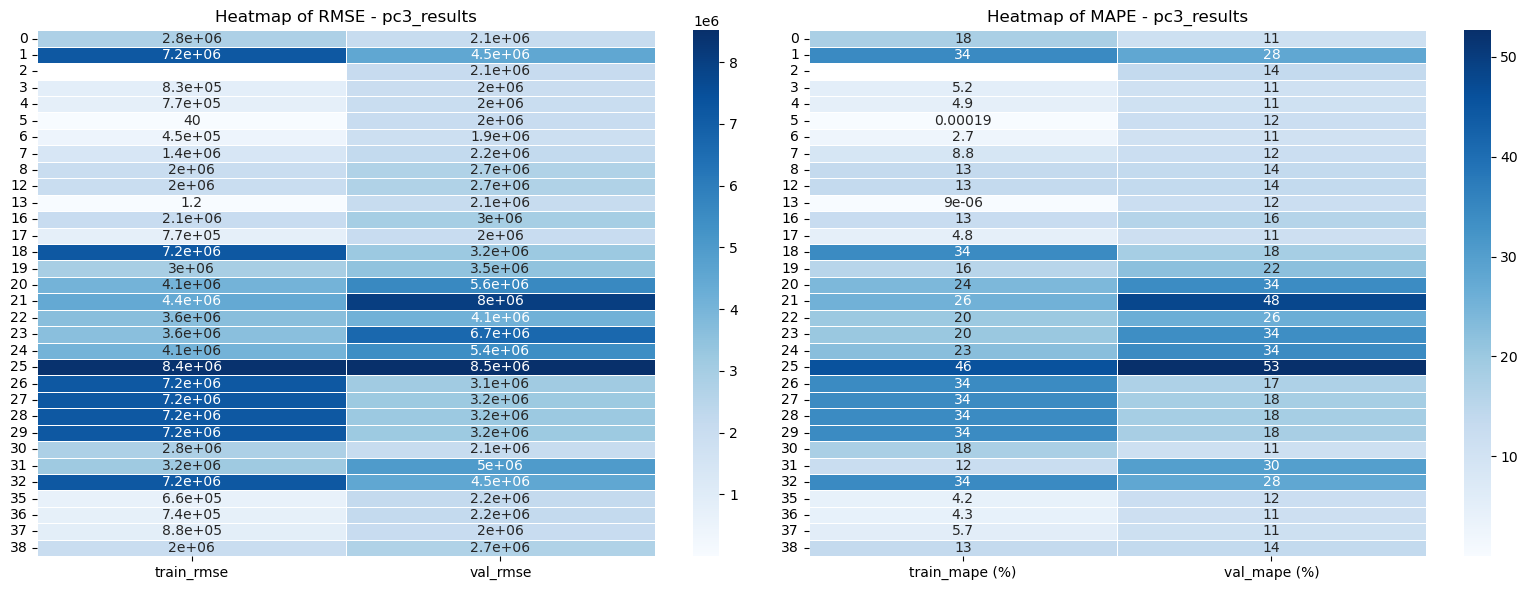

In [38]:
for df_name in results: 
    df = globals()[df_name]

    # Select numeric columns only
    numeric_df = df.select_dtypes(include='number')

    # 2 Subplots
    if numeric_df.shape[1] >= 4:
        first_two_cols = numeric_df.iloc[:, :2]
        second_two_cols = numeric_df.iloc[:, 2:4]
    
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))  

        sns.heatmap(first_two_cols, annot=True, cmap='Blues', linewidths=0.5, ax=axes[0])
        axes[0].set_title(f"Heatmap of RMSE - {df_name}")

        sns.heatmap(second_two_cols, annot=True, cmap='Blues', linewidths=0.5, ax=axes[1])
        axes[1].set_title(f"Heatmap of MAPE - {df_name}")

        plt.tight_layout()
        plt.show()


# 5. Final Models & Predictions

#### Product Category 1

In [7]:
index = 10
print(f'Best model: {pc1_results.iloc[index][0]}')
print('')
print(f'Best features: {pc1_results.iloc[index][1]}')
print('')
print(f'Best parameters: {pc1_results.iloc[index][2]}')

Best model: XGBRegressor

Best features: ['CHI Production Index_Lag_12_RollingMean3', 'CC_UK_Lag_12_RollingMean3', '#14_Lag_1_RollingMean6', '#5_Lag_1', 'Clean_US_Lag_12', '#12_Lag_1_RollingMean6', '#9_Lag_12', '#4_Lag_6', '#3_Lag_1_RollingMean3', '#5_Lag_1_RollingMean3', 'Clean_UK_Lag_12', 'Clean_Ita_Lag_12_RollingMean3', 'sin_Quarter', 'ITA EE Producer Prices_Lag_12', 'GER EE Production Index_Lag_12_RollingMean3', 'Fossil_Fra_Lag_12']

Best parameters: {}


In [8]:
model = XGBRegressor()
best_features1 = ['CHI Production Index_Lag_12_RollingMean3', 'CC_UK_Lag_12_RollingMean3', '#14_Lag_1_RollingMean6', '#5_Lag_1', 'Clean_US_Lag_12', '#12_Lag_1_RollingMean6', '#9_Lag_12', '#4_Lag_6', '#3_Lag_1_RollingMean3', '#5_Lag_1_RollingMean3', 'Clean_UK_Lag_12', 'Clean_Ita_Lag_12_RollingMean3', 'sin_Quarter', 'ITA EE Producer Prices_Lag_12', 'GER EE Production Index_Lag_12_RollingMean3', 'Fossil_Fra_Lag_12']
print(len(best_features1))
best_parameters = []

16


**Train Model with Best Features**

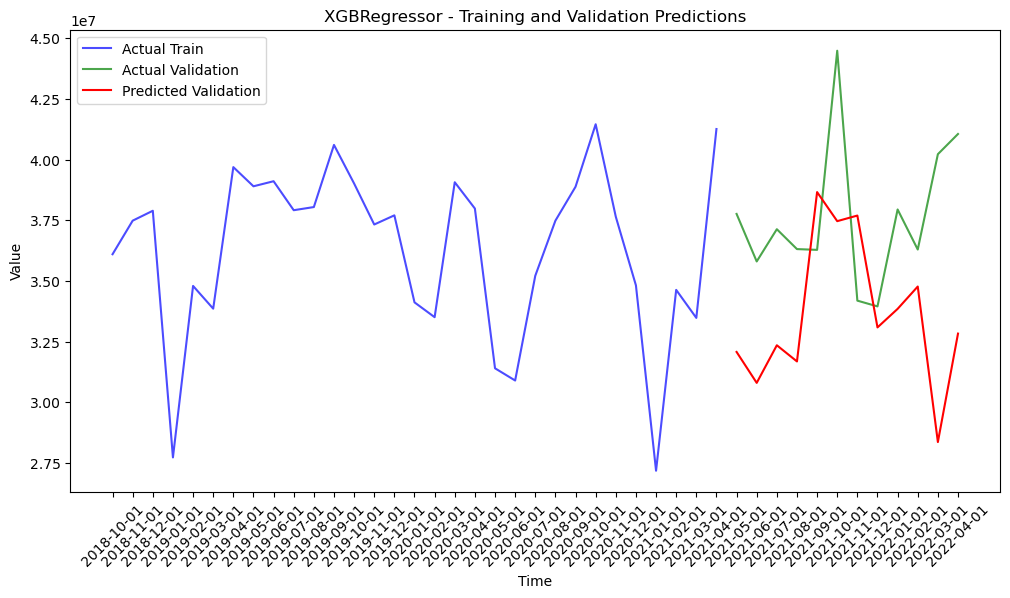

In [9]:
model_fits_1, val_preds_1 = fs.all_models(
        model,
        X_train_scaled[best_features1], X_val_scaled[best_features1], 
        y_train_1, y_val_1,
        plot=True,
        csv_path = None
        )

#### Product Category 3

In [10]:
index = 6
print(f'Best model: {pc3_results.iloc[index][0]}')
print('')
print(f'Best features: {pc3_results.iloc[index][1]}')
print('')
print(f'Best parameters: {pc3_results.iloc[index][2]}')

Best model: XGBRegressor

Best features: ['GerHolidayCount', '#20_Lag_1', '#14_Lag_1', 'SWI Production Index_Lag_12', 'TotalDaysInMonth', 'stock_price_change_Lag_12', '#36_Lag_12', '#8_Lag_3', '#12_Lag_12', 'Fossil_Chi_Lag_12_RollingMean3', 'USA Shipments Index_Lag_12']

Best parameters: {'n_estimators': 100, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.1, 'learning_rate': 0.05}


In [11]:
model = XGBRegressor()
best_features3 = ['GerHolidayCount', '#20_Lag_1', '#14_Lag_1', 'SWI Production Index_Lag_12', 'TotalDaysInMonth', 'stock_price_change_Lag_12', '#36_Lag_12', '#8_Lag_3', '#12_Lag_12', 'Fossil_Chi_Lag_12_RollingMean3', 'USA Shipments Index_Lag_12']
best_parameters = {'n_estimators': 100, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.1, 'learning_rate': 0.05}

**Train Model with Best Features**

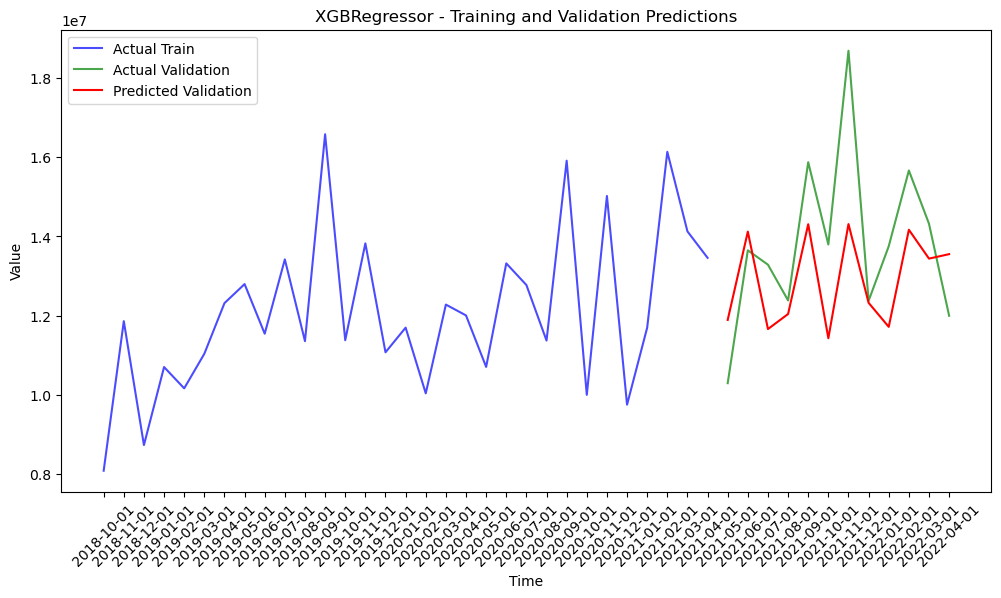

In [12]:
model_fits_3, val_preds_3 = fs.all_models(
        model,
        X_train_scaled[best_features3], X_val_scaled[best_features3], 
        y_train_3, y_val_3,
        plot=True,
        csv_path = None, 
        n_estimators = 100, max_depth = 4,
        min_child_weight = 5, gamma = 0.1, learning_rate = 0.05
        )

#### Product Category 4

In [13]:
index = -1
print(f'Best model: {pc4_results.iloc[index][0]}')
print('')
print(f'Best features: {pc4_results.iloc[index][1]}')
print('')
print(f'Best parameters: {pc4_results.iloc[index][2]}')

Best model: arima

Best features: nan

Best parameters: (3, 1, 1)


In [14]:
model = XGBRegressor()
best_features4 = ['#16_Lag_1', '(W) Price of Base Metals_Lag_12', '#6_Lag_1_RollingMean3', '#3_Lag_1', '#12_Lag_1', 'Clean_US_Lag_12_RollingMean6']

**Train Model with Best Features**

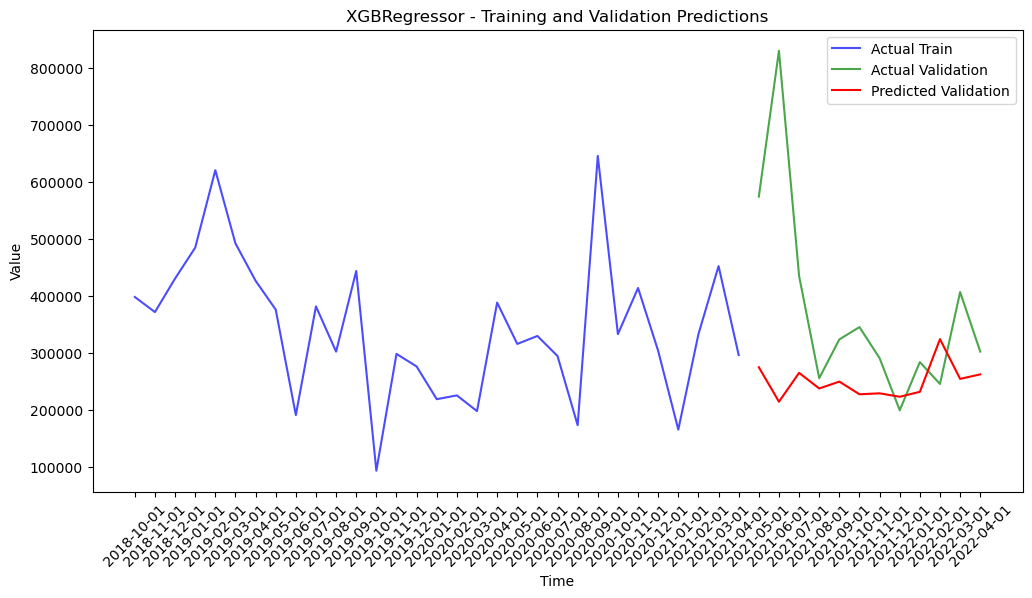

In [15]:
model_fits_4, val_preds_4 = fs.all_models(
        model,
        X_train_scaled[best_features4], X_val_scaled[best_features4], 
        y_train_4, y_val_4,
        plot=True,
        csv_path = None
        )

#### Product Category 5

In [16]:
index = 6
print(f'Best model: {pc5_results.iloc[index][0]}')
print('')
print(f'Best features: {pc5_results.iloc[index][1]}')
print('')
print(f'Best parameters: {pc5_results.iloc[index][2]}')

Best model: XGBRegressor

Best features: ['#1_Lag_1', '#20_Lag_1', '#5_Lag_1', 'TotalDaysInMonth', 'USA EUR to LCU Conversion Rate _Lag_12', '#4_Lag_6', '#16_Lag_3', 'stock_price_change_Lag_12', 'stock_volume_Lag_12', '#13_Lag_3_RollingMean3', 'CC_UK_Lag_12', '#4_Lag_1_RollingMean3']

Best parameters: {'n_estimators': 100, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.1, 'learning_rate': 0.05}


In [17]:
model = XGBRegressor()
best_features5 = ['#1_Lag_1', '#20_Lag_1', '#5_Lag_1', 'TotalDaysInMonth', 'USA EUR to LCU Conversion Rate _Lag_12', '#4_Lag_6', '#16_Lag_3', 'stock_price_change_Lag_12', 'stock_volume_Lag_12', '#13_Lag_3_RollingMean3', 'CC_UK_Lag_12', '#4_Lag_1_RollingMean3']
best_parameters = {'n_estimators': 100, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.1, 'learning_rate': 0.05}

**Train Model with Best Features**

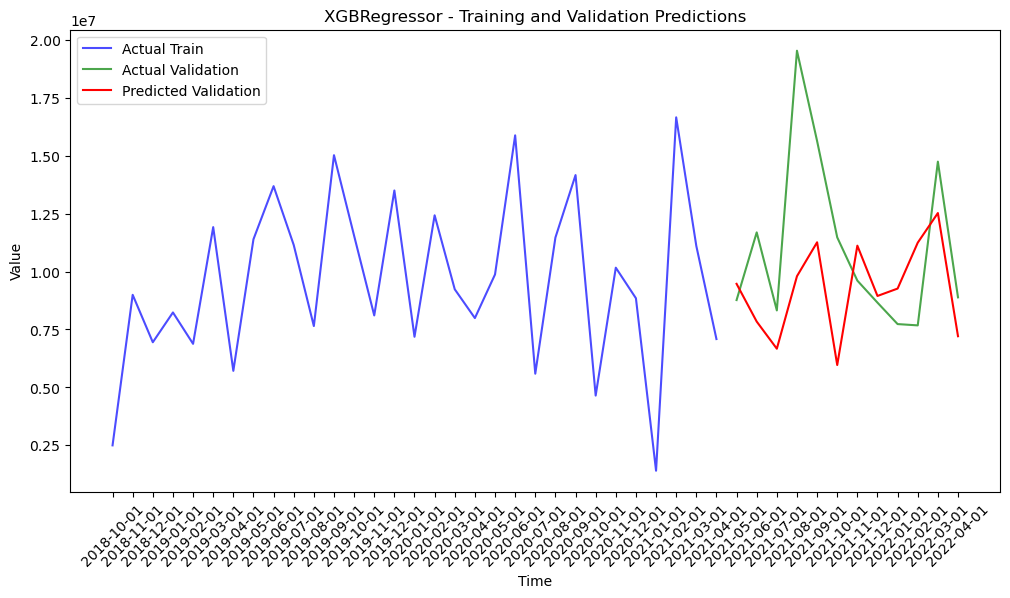

In [18]:
model_fits_5, val_preds_5 = fs.all_models(
        model,
        X_train_scaled[best_features5], X_val_scaled[best_features5], 
        y_train_5, y_val_5,
        plot=True,
        csv_path = None,
        n_estimators = 100, max_depth = 4,
        min_child_weight = 5, gamma = 0.1, learning_rate = 0.05
        )

#### Product Category 6

In [19]:
index = 7
print(f'Best model: {pc6_results.iloc[index][0]}')
print('')
print(f'Best features: {pc6_results.iloc[index][1]}')
print('')
print(f'Best parameters: {pc6_results.iloc[index][2]}')

Best model: XGBRegressor

Best features: ['CHI Production Index_Lag_12', '#20_Lag_1', '#11_Lag_1_RollingMean3', 'SWI EE Production Index_Lag_12_RollingMean3', '#20_Lag_1_RollingMean3', 'Clean_Chi_Lag_12', '#9_Lag_12_RollingMean3', 'USA EE Producer Prices_Lag_12', '#14_Lag_1_RollingMean6', '#5_Lag_1', '#12_Lag_3', '#14_Lag_6', '#6_Lag_1_RollingMean6', 'SWI EE Production Index_Lag_12', '#8_Lag_3', 'Fossil_Fra_Lag_12', '#3_Lag_1']

Best parameters: {'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.1, 'learning_rate': 0.01}


In [20]:
model = XGBRegressor()
best_features6 = ['CHI Production Index_Lag_12', '#20_Lag_1', '#11_Lag_1_RollingMean3', 'SWI EE Production Index_Lag_12_RollingMean3', '#20_Lag_1_RollingMean3', 'Clean_Chi_Lag_12', '#9_Lag_12_RollingMean3', 'USA EE Producer Prices_Lag_12', '#14_Lag_1_RollingMean6', '#5_Lag_1', '#12_Lag_3', '#14_Lag_6', '#6_Lag_1_RollingMean6', 'SWI EE Production Index_Lag_12', '#8_Lag_3', 'Fossil_Fra_Lag_12', '#3_Lag_1']
best_parameters = {'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.1, 'learning_rate': 0.01}

**Train Model with Best Features**

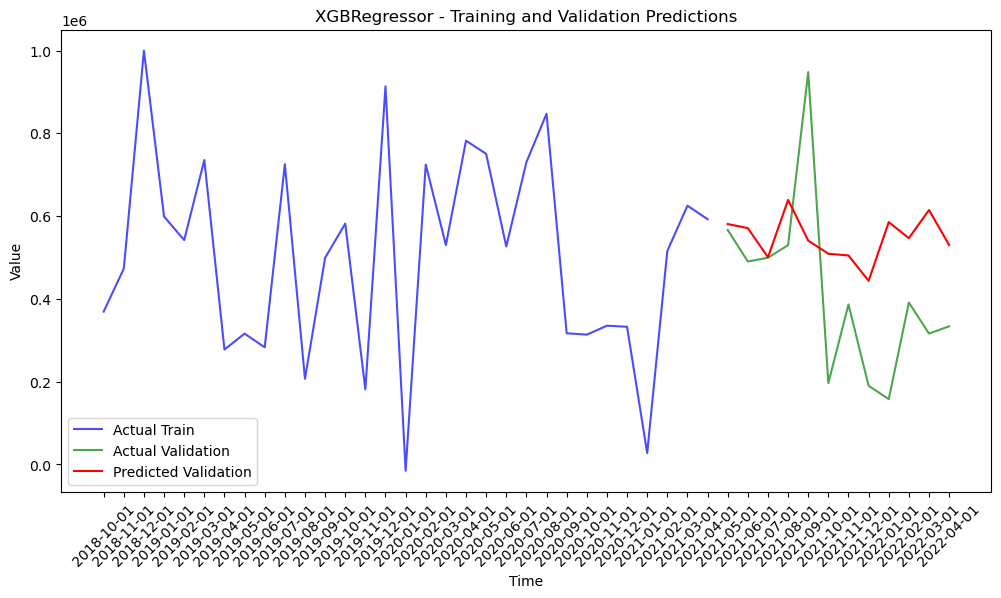

In [21]:
model_fits_6, val_preds_6 = fs.all_models(
        model,
        X_train_scaled[best_features6], X_val_scaled[best_features6], 
        y_train_6, y_val_6,
        plot=True,
        csv_path = None,
        max_depth = 4, min_child_weight = 5, gamma = 0.1, learning_rate = 0.01
        )

#### Product Category 8

In [22]:
index = 2
print(f'Best model: {pc8_results.iloc[index][0]}')
print('')
print(f'Best features: {pc8_results.iloc[index][1]}')
print('')
print(f'Best parameters: {pc8_results.iloc[index][2]}')

Best model: prophet

Best features: nan

Best parameters: nan


In [23]:
model = 'prophet'
best_features = []
best_parameters = []

**Train Model with Best Features**

23:24:12 - cmdstanpy - INFO - Chain [1] start processing
23:24:12 - cmdstanpy - INFO - Chain [1] done processing


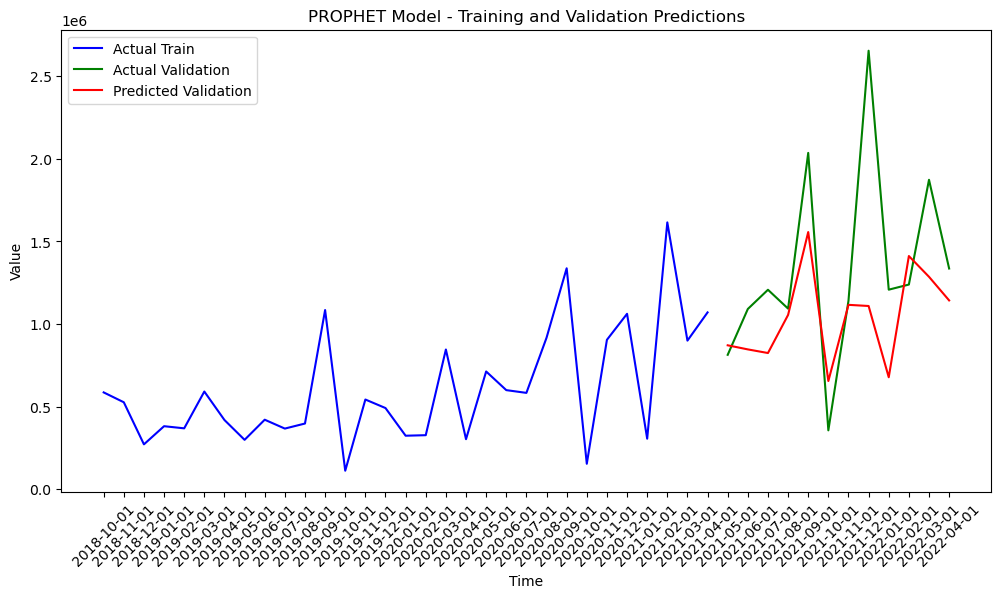

In [24]:
model_fits_8, val_preds_8 = fs.stats_models(
        'prophet', X_train_scaled, X_val_scaled, 
        y_train_8, y_val_8,
        plot=True
    )

#### Product Category 9

In [25]:
index = 7
print(f'Best model: {pc9_results.iloc[index][0]}')
print('')
print(f'Best features: {pc9_results.iloc[index][1]}')
print('')
print(f'Best parameters: {pc9_results.iloc[index][2]}')

Best model: XGBRegressor

Best features: ['#1_Lag_1', 'CHI Production Index_Lag_12', '#20_Lag_1', 'CC_UK_Lag_12_RollingMean3', '#9_Lag_12_RollingMean3', '#14_Lag_1', '#36_Lag_1', 'GER EE Production Index_Lag_12', '#14_Lag_6', 'GER Production Index_Lag_12', 'Fossil_Chi_Lag_12_RollingMean6', '#4_Lag_1_RollingMean3']

Best parameters: {'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.1, 'learning_rate': 0.01}


In [26]:
model = XGBRegressor()
best_features9 = ['#1_Lag_1', 'CHI Production Index_Lag_12', '#20_Lag_1', 'CC_UK_Lag_12_RollingMean3', '#9_Lag_12_RollingMean3', '#14_Lag_1', '#36_Lag_1', 'GER EE Production Index_Lag_12', '#14_Lag_6', 'GER Production Index_Lag_12', 'Fossil_Chi_Lag_12_RollingMean6', '#4_Lag_1_RollingMean3']
best_parameters = {'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.1, 'learning_rate': 0.01}

**Train Model with Best Features**

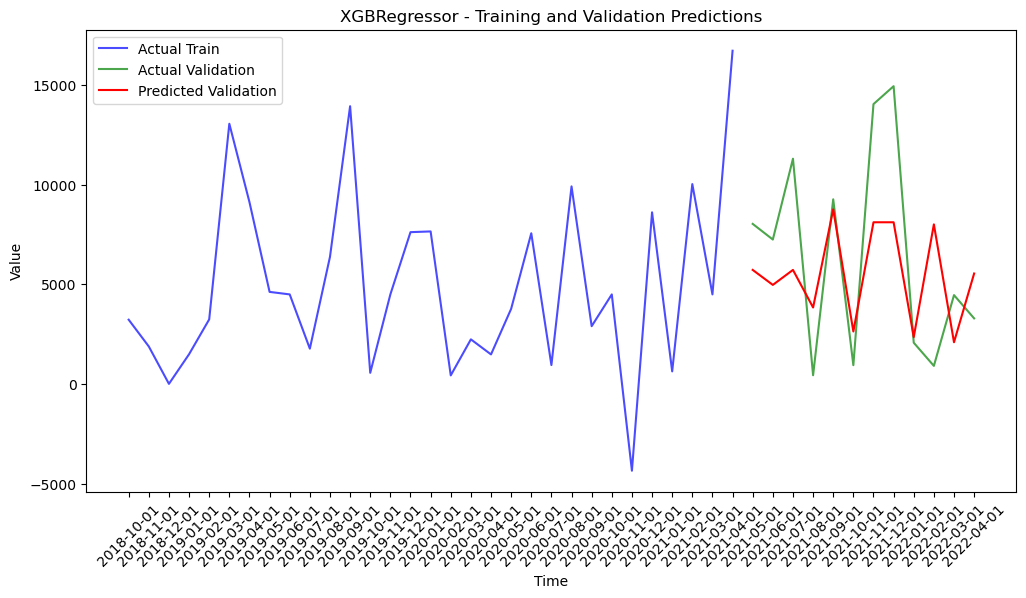

In [27]:
model_fits_9, val_preds_9 = fs.all_models(
        model,
        X_train_scaled[best_features9], X_val_scaled[best_features9], 
        y_train_9, y_val_9,
        plot=True,
        csv_path = None,
        max_depth = 4, min_child_weight = 5, gamma = 0.1, learning_rate = 0.01
        )

#### Product Category 11

In [28]:
index = 2
print(f'Best model: {pc11_results.iloc[index][0]}')
print('')
print(f'Best features: {pc11_results.iloc[index][1]}')
print('')
print(f'Best parameters: {pc11_results.iloc[index][2]}')

Best model: prophet

Best features: nan

Best parameters: nan


In [29]:
model = 'prophet'
best_features = []
best_parameters = []

**Train Model with Best Features**

23:24:13 - cmdstanpy - INFO - Chain [1] start processing
23:24:13 - cmdstanpy - INFO - Chain [1] done processing


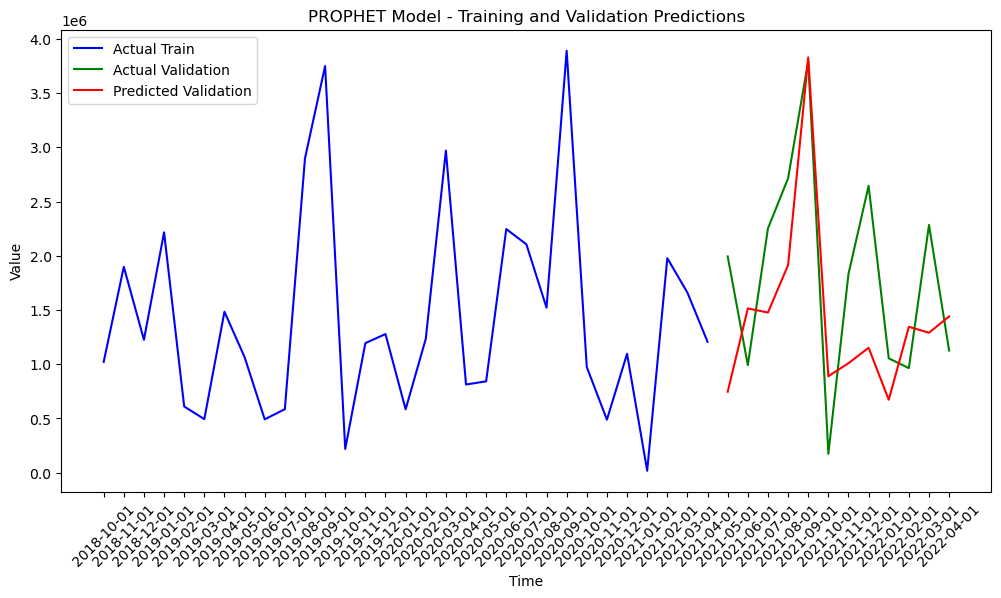

In [30]:
model_fits_11, val_preds_11 = fs.stats_models(
        'prophet', X_train_scaled, X_val_scaled, 
        y_train_11, y_val_11,
        plot=True
    )

#### Product Category 12

In [31]:
index = 6
print(f'Best model: {pc12_results.iloc[index][0]}')
print('')
print(f'Best features: {pc12_results.iloc[index][1]}')
print('')
print(f'Best parameters: {pc12_results.iloc[index][2]}')

Best model: XGBRegressor

Best features: ['CHI EE Producer Prices_Lag_12', 'CC_CHI_Lag_12', '#16_Lag_3', '#6_Lag_1_RollingMean6', 'Clean_Ita_Lag_12_RollingMean3', 'UK EE Producer Prices_Lag_12', '#6_Lag_1_RollingMean3', '#13_Lag_3_RollingMean6', '#6_Lag_1', '#9_Lag_1', '#16_Lag_1_RollingMean6', '#12_Lag_1_RollingMean3', 'Fossil_Fra_Lag_12', '#14_Lag_1_RollingMean3', '#12_Lag_3', '#14_Lag_1', '#36_Lag_1', 'USA EUR to LCU Conversion Rate _Lag_12', 'stock_price_change_Lag_12', '#12_Lag_1', '#9_Lag_1_RollingMean6', 'USA Shipments Index_Lag_12', '#4_Lag_1_RollingMean3', 'CHI Production Index_Lag_12', 'stock_price_Lag_12', '#20_Lag_1', '#36_Lag_12', '#9_Lag_1_RollingMean3']

Best parameters: {'n_estimators': 100, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.1, 'learning_rate': 0.05}


In [32]:
model = XGBRegressor()
best_features12 = ['CHI EE Producer Prices_Lag_12', 'CC_CHI_Lag_12', '#16_Lag_3', '#6_Lag_1_RollingMean6', 'Clean_Ita_Lag_12_RollingMean3', 'UK EE Producer Prices_Lag_12', '#6_Lag_1_RollingMean3', '#13_Lag_3_RollingMean6', '#6_Lag_1', '#9_Lag_1', '#16_Lag_1_RollingMean6', '#12_Lag_1_RollingMean3', 'Fossil_Fra_Lag_12', '#14_Lag_1_RollingMean3', '#12_Lag_3', '#14_Lag_1', '#36_Lag_1', 'USA EUR to LCU Conversion Rate _Lag_12', 'stock_price_change_Lag_12', '#12_Lag_1', '#9_Lag_1_RollingMean6', 'USA Shipments Index_Lag_12', '#4_Lag_1_RollingMean3', 'CHI Production Index_Lag_12', 'stock_price_Lag_12', '#20_Lag_1', '#36_Lag_12', '#9_Lag_1_RollingMean3']
best_parameters = {'n_estimators': 100, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.1, 'learning_rate': 0.05}

**Train Model with Best Features**

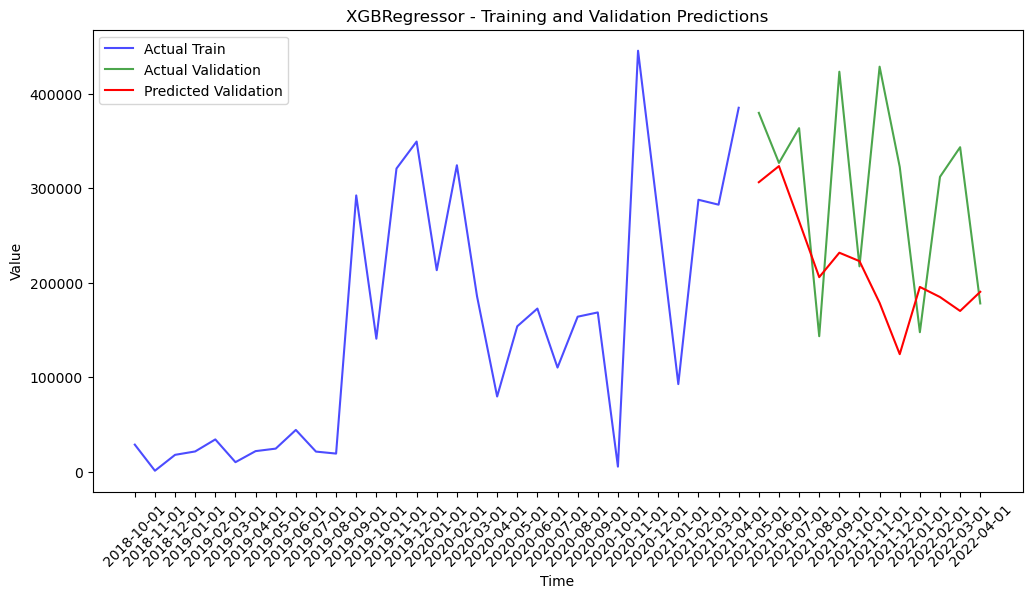

In [33]:
model_fits_12, val_preds_12 = fs.all_models(
        model,
        X_train_scaled[best_features12], X_val_scaled[best_features12], 
        y_train_12, y_val_12,
        plot=True,
        csv_path = None,
        n_estimators = 100, max_depth = 4,
        min_child_weight = 5, gamma = 0.1, learning_rate = 0.05
        )

#### Product Category 13

In [34]:
index = 10
print(f'Best model: {pc13_results.iloc[index][0]}')
print('')
print(f'Best features: {pc13_results.iloc[index][1]}')
print('')
print(f'Best parameters: {pc13_results.iloc[index][2]}')

Best model: XGBRegressor

Best features: ['USA Shipments Index_Lag_12_RollingMean3', 'Clean_US_Lag_12', '#6_Lag_1_RollingMean3', 'cos_month', '#6_Lag_1_RollingMean6', '#8_Lag_3', 'cos_Quarter', '#3_Lag_1']

Best parameters: {}


In [35]:
model = XGBRegressor()
best_features13 = ['USA Shipments Index_Lag_12_RollingMean3', 'Clean_US_Lag_12', '#6_Lag_1_RollingMean3', 'cos_month', '#6_Lag_1_RollingMean6', '#8_Lag_3', 'cos_Quarter', '#3_Lag_1']
best_parameters = (3, 1, 1, 12)

**Train Model with Best Features**

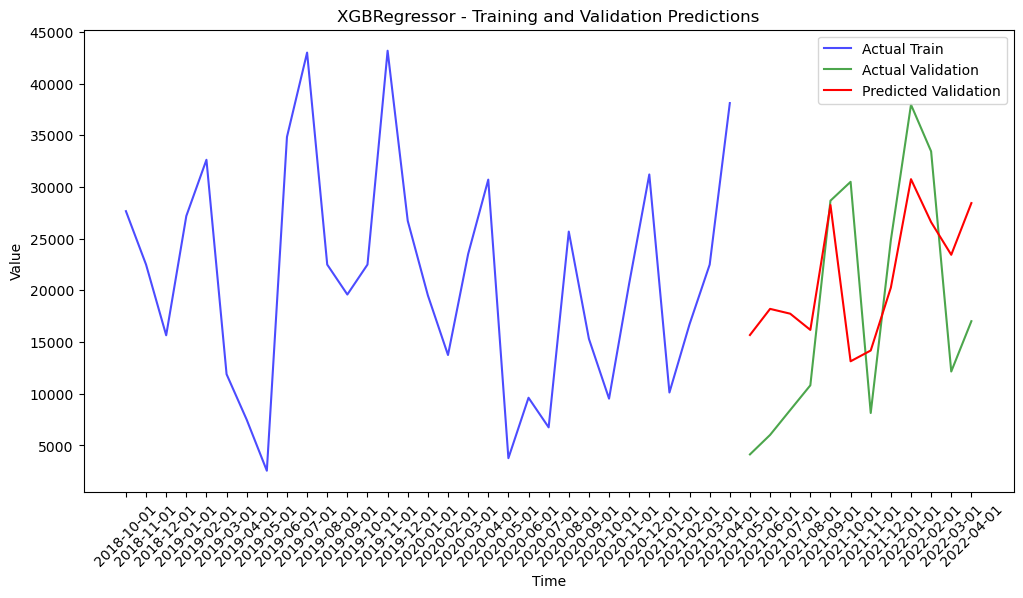

In [36]:
model_fits_13, val_preds_13 = fs.all_models(
        model,
        X_train_scaled[best_features13], X_val_scaled[best_features13], 
        y_train_13, y_val_13,
        plot=True,
        csv_path = None,
        )

#### Product Category 14

In [37]:
index = 2
print(f'Best model: {pc14_results.iloc[index][0]}')
print('')
print(f'Best features: {pc14_results.iloc[index][1]}')
print('')
print(f'Best parameters: {pc14_results.iloc[index][2]}')

Best model: prophet

Best features: nan

Best parameters: nan


In [38]:
model = 'prophet'
best_features = []
best_parameters = []

**Train Model with Best Features**

23:24:15 - cmdstanpy - INFO - Chain [1] start processing
23:24:15 - cmdstanpy - INFO - Chain [1] done processing


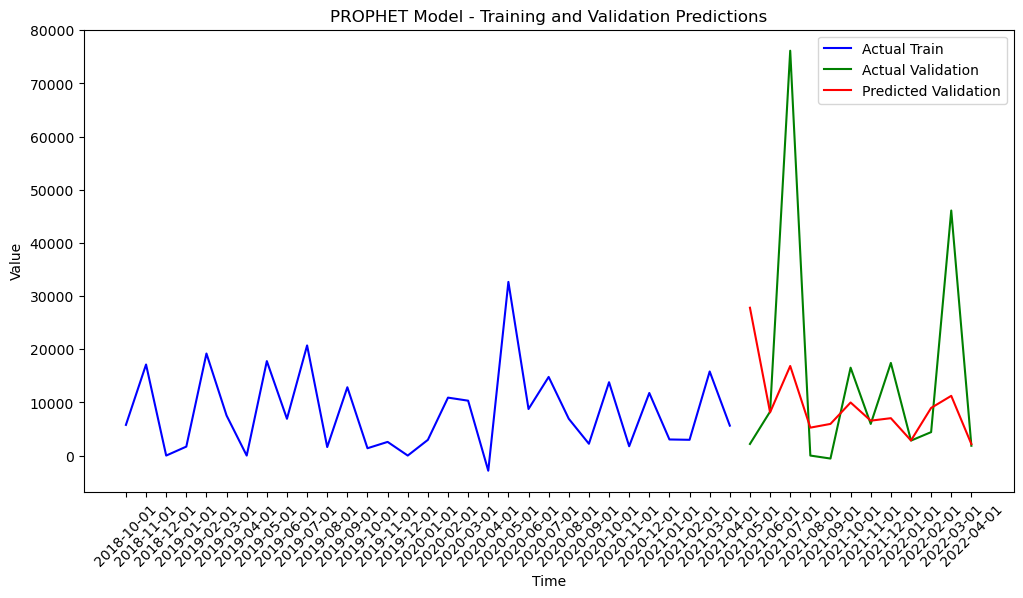

In [39]:
model_fits_14, val_preds_14 = fs.stats_models(
        'prophet', X_train_scaled, X_val_scaled, 
        y_train_14, y_val_14,
        plot=True
    )

#### Product Category 16

In [40]:
index = 4
print(f'Best model: {pc16_results.iloc[index][0]}')
print('')
print(f'Best features: {pc16_results.iloc[index][1]}')
print('')
print(f'Best parameters: {pc16_results.iloc[index][2]}')

Best model: RandomForestRegressor

Best features: ['#3_Lag_1_RollingMean12', 'FRA EE Producer Prices_Lag_12_RollingMean3', '#9_Lag_12_RollingMean3', 'Fossil_US_Lag_12', 'USA EE Producer Prices_Lag_12', '#6_Lag_1_RollingMean3', 'Clean_Fra_Lag_12', 'JAP Production Index_Lag_12', '#9_Lag_1', '#12_Lag_1_RollingMean3', '#11_Lag_1_RollingMean3', '#12_Lag_3', '#4_Lag_6', '#9_Lag_1_RollingMean6', 'USA Shipments Index_Lag_12', '#14_Lag_6_RollingMean6', 'CC_UK_Lag_12_RollingMean3', '#9_Lag_12', '#4_Lag_6_RollingMean3', '#9_Lag_1_RollingMean3']

Best parameters: {'n_estimators': 200, 'max_depth': 6}


In [41]:
model = RandomForestRegressor()
best_features16 = ['#3_Lag_1_RollingMean12', 'FRA EE Producer Prices_Lag_12_RollingMean3', '#9_Lag_12_RollingMean3', 'Fossil_US_Lag_12', 'USA EE Producer Prices_Lag_12', '#6_Lag_1_RollingMean3', 'Clean_Fra_Lag_12', 'JAP Production Index_Lag_12', '#9_Lag_1', '#12_Lag_1_RollingMean3', '#11_Lag_1_RollingMean3', '#12_Lag_3', '#4_Lag_6', '#9_Lag_1_RollingMean6', 'USA Shipments Index_Lag_12', '#14_Lag_6_RollingMean6', 'CC_UK_Lag_12_RollingMean3', '#9_Lag_12', '#4_Lag_6_RollingMean3', '#9_Lag_1_RollingMean3']
best_parameters = {'n_estimators': 200, 'max_depth': 6}

**Train Model with Best Features**

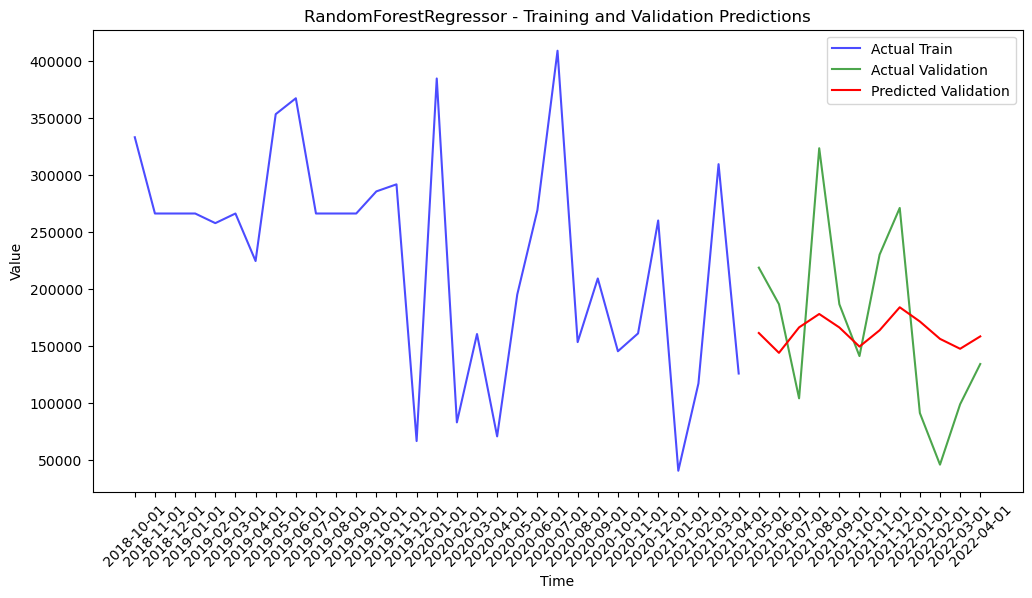

In [42]:
model_fits_16, val_preds_16 = fs.all_models(
        model,
        X_train_scaled[best_features16], X_val_scaled[best_features16], 
        y_train_16, y_val_16,
        plot=True,
        csv_path = None,
        n_estimators = 200, max_depth = 6
        )

#### Product Category 20

In [43]:
index = 6
print(f'Best model: {pc20_results.iloc[index][0]}')
print('')
print(f'Best features: {pc20_results.iloc[index][1]}')
print('')
print(f'Best parameters: {pc20_results.iloc[index][2]}')

Best model: XGBRegressor

Best features: ['#16_Lag_3_RollingMean6', '#14_Lag_1_RollingMean6', '#6_Lag_1_RollingMean3', '#5_Lag_1', '#9_Lag_12', '#1_Lag_1_RollingMean6', '#16_Lag_1', 'Year', 'Fossil_US_Lag_12_RollingMean3', 'Fossil_Chi_Lag_12_RollingMean6', '#12_Lag_1_RollingMean3', '#3_Lag_1']

Best parameters: {'n_estimators': 100, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.1, 'learning_rate': 0.05}


In [44]:
model = XGBRegressor()
best_features20 = ['#16_Lag_3_RollingMean6', '#14_Lag_1_RollingMean6', '#6_Lag_1_RollingMean3', '#5_Lag_1', '#9_Lag_12', '#1_Lag_1_RollingMean6', '#16_Lag_1', 'Year', 'Fossil_US_Lag_12_RollingMean3', 'Fossil_Chi_Lag_12_RollingMean6', '#12_Lag_1_RollingMean3', '#3_Lag_1']
best_parameters = {'n_estimators': 100, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.1, 'learning_rate': 0.05}

**Train Model with Best Features**

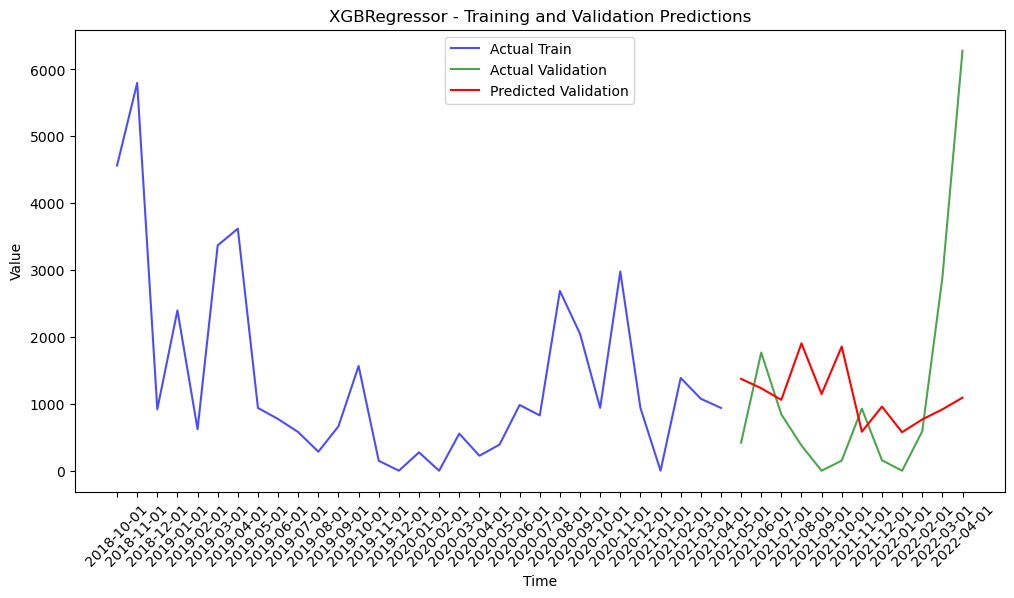

In [45]:
model_fits_20, val_preds_20 = fs.all_models(
        model,
        X_train_scaled[best_features20], X_val_scaled[best_features20], 
        y_train_20, y_val_20,
        plot=True,
        csv_path = None, 
        n_estimators = 100,
        max_depth = 4,
        min_child_weight = 5, gamma = 0.1, learning_rate = 0.05
        )

#### Product Category 36

In [46]:
index = 7
print(f'Best model: {pc36_results.iloc[index][0]}')
print('')
print(f'Best features: {pc36_results.iloc[index][1]}')
print('')
print(f'Best parameters: {pc36_results.iloc[index][2]}')

Best model: XGBRegressor

Best features: ['CC_UK_Lag_12_RollingMean3', '#12_Lag_3', '#14_Lag_1', '#12_Lag_1_RollingMean6', '#9_Lag_12', '#1_Lag_1_RollingMean3', 'stock_volume_Lag_12', 'GER Production Index_Lag_12', '#36_Lag_12', '#8_Lag_3', '#16_Lag_1_RollingMean3', 'GER EE Production Index_Lag_12_RollingMean3', '#13_Lag_1']

Best parameters: {'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.1, 'learning_rate': 0.01}


In [47]:
model = XGBRegressor()
best_features36 = ['CC_UK_Lag_12_RollingMean3', '#12_Lag_3', '#14_Lag_1', '#12_Lag_1_RollingMean6', '#9_Lag_12', '#1_Lag_1_RollingMean3', 'stock_volume_Lag_12', 'GER Production Index_Lag_12', '#36_Lag_12', '#8_Lag_3', '#16_Lag_1_RollingMean3', 'GER EE Production Index_Lag_12_RollingMean3', '#13_Lag_1']
best_parameters = {'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.1, 'learning_rate': 0.01}

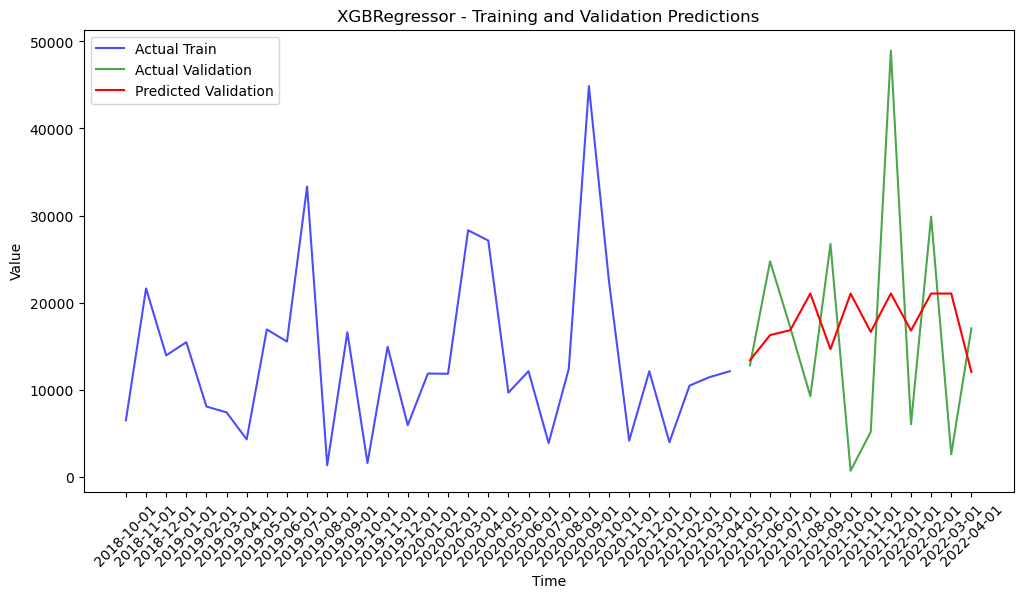

In [48]:
model_fits_36, val_preds_36 = fs.all_models(
        model,
        X_train_scaled[best_features36], X_val_scaled[best_features36], 
        y_train_36, y_val_36,
        plot=True,
        csv_path = None, 
        max_depth = 4,
        min_child_weight = 5, gamma = 0.1, learning_rate = 0.01
        )

### Final Model Dictionary

In [49]:
pcs_model_fits = {
    '1': model_fits_1, 
    '3': model_fits_3,
    '4': model_fits_4,
    '5': model_fits_5,
    '6': model_fits_6,
    '8': model_fits_8,
    '9': model_fits_9,
    '11': model_fits_11,
    '12': model_fits_12,
    '13': model_fits_13,  
    '14': model_fits_14,
    '16': model_fits_16,
    '20': model_fits_20,
    '36': model_fits_36
}

In [50]:
pcs_best_feat = {
    '1': best_features1, 
    '3': best_features3,
    '4': best_features4,
    '5': best_features5,
    '6': best_features6,
    '8': [],
    '9': best_features9,
    '11': [],
    '12': best_features12,
    '13': best_features13,  
    '14': [],
    '16': best_features16,
    '20': best_features20,
    '36': best_features36
}

# 6. Final Dataframe

**Predictions**

In [69]:
y_test_preds = fs.predict_and_update(pcs_model_fits, X_train_scaled, 
                                     X_val_scaled, X_test_scaled, pcs_best_feat)
y_test_preds

{'1': [np.float32(32475618.0),
  np.float32(32900876.0),
  np.float32(32817476.0),
  np.float32(34103148.0),
  np.float32(37678720.0),
  np.float32(39200652.0),
  np.float32(32868224.0),
  np.float32(32508612.0),
  np.float32(33724412.0),
  np.float32(34388880.0)],
 '3': [np.float32(11648434.0),
  np.float32(13508795.0),
  np.float32(13397224.0),
  np.float32(11966669.0),
  np.float32(14592043.0),
  np.float32(10756338.0),
  np.float32(13565218.0),
  np.float32(11170660.0),
  np.float32(9454537.0),
  np.float32(15099422.0)],
 '4': [np.float32(287606.0),
  np.float32(95270.31),
  np.float32(104103.336),
  np.float32(104103.336),
  np.float32(104103.336),
  np.float32(104103.625),
  np.float32(104103.625),
  np.float32(104103.625),
  np.float32(104103.625),
  np.float32(104103.625)],
 '5': [np.float32(6824398.0),
  np.float32(7454637.5),
  np.float32(6584961.5),
  np.float32(6883267.5),
  np.float32(7948227.0),
  np.float32(7427915.0),
  np.float32(8363454.0),
  np.float32(8708802.0),
  

**Join Dataframes**

In [70]:
test_template = pd.read_csv('data/Case2_Test Set Template.csv', sep = ';')
test_template.head(3)

Month Year Mapped_GCK  Sales_EUR
0     Mai 22         #3        NaN
1     Jun 22         #3        NaN
2     Jul 22         #3        NaN

In [71]:
# Define the date order
dates = ['Mai 22', 'Jun 22', 'Jul 22', 'Aug 22', 'Sep 22', 'Okt 22',
         'Nov 22', 'Dez 22', 'Jan 23', 'Feb 23']

# Create DataFrame
df = pd.DataFrame(y_test_preds, index=dates)

# Reset index to have 'Month Year' as a column
df = df.reset_index().rename(columns={'index': 'Month Year'})

# Convert DataFrame from wide format to long format
df_long = df.melt(id_vars=["Month Year"], var_name="Mapped_GCK", value_name="Sales_EUR")
df_long["Mapped_GCK"] = df_long["Mapped_GCK"].apply(lambda x: f"#{x}")
df_long

Month Year Mapped_GCK   Sales_EUR
0       Mai 22         #1 32475618.00
1       Jun 22         #1 32900876.00
2       Jul 22         #1 32817476.00
3       Aug 22         #1 34103148.00
4       Sep 22         #1 37678720.00
..         ...        ...         ...
135     Okt 22        #36    11813.16
136     Nov 22        #36    12028.35
137     Dez 22        #36    12427.63
138     Jan 23        #36    16819.02
139     Feb 23        #36    15544.11

[140 rows x 3 columns]

In [72]:
df_long.to_csv('./data/final_predictions/predictions.csv')